In [2]:
import numpy as np
import pandas as pd
import statistics
import scipy.stats as ss
import matplotlib.pyplot as plt
import arch
from arch import arch_model

In [3]:
file_path = "Data_v2_2024.06.11 - Copy.xlsx"
df = pd.read_excel(file_path, sheet_name=0, header=[2])
df.head()


Security  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0 2000-01-31     4.23896     4.58132     4.86683     5.10004     5.28260   
1 2000-02-29     4.25200     4.60680     4.90355     5.11070     5.22540   
2 2000-03-31     4.33939     4.55378     4.76117     4.92476     5.05400   
3 2000-04-30     4.54018     4.74086     4.93674     5.09062     5.19195   
4 2000-05-31     4.96217     5.07444     5.17651     5.24498     5.28590   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  G0025Z 1Y BLC2 Curncy  \
0     5.38266     5.53022    5.645347    5.699073  ...                6.18476   
1     5.37580     5.50900    5.607400    5.684600  ...                6.16679   
2     5.17299     5.27308    5.338053    5.390427  ...                6.17866   
3     5.29858     5.37176    5.430173    5.469287  ...                6.21918   
4     5.34867     5.39454    5.425560    5.440080  ...                6.28279   

   G0025Z 2Y BLC2 Curncy  G0025Z 3Y BLC2 Curncy  G0025Z 4Y BLC2 Curncy  \
0                6.48765                6.53810                6.56334   
1                6.42546                6.46163                6.47975   
2                6.38049                6.27461                6.22156   
3                6.57470                6.48300                6.43619   
4                6.57080                6.47788                6.43132   

   G0025Z 5Y BLC2 Curncy  G0025Z 6Y BLC2 Curncy  G0025Z 7Y BLC2 Curncy  \
0                6.57418                6.56785                6.56332   
1                6.46495                6.40220                6.35736   
2                6.15213                6.05292                5.98204   
3                6.35882                6.25681                6.18393   
4                6.39944                6.30497                6.23747   

   G0025Z 8Y BLC2 Curncy  G0025Z 9Y BLC2 Curncy  G0025Z 10Y BLC2 Curncy  
0                6.55993                6.55728                 6.53920  
1                6.32365                6.29751                 6.27536  
2                5.92875                5.88742                 5.85431  
3                6.12913                6.08664                 6.04973  
4                6.18672                6.14737                 6.11016  

[5 rows x 121 columns]

In [4]:
# Define the maturity labels and country codes
maturity_labels = ['1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y']
country_codes = ['EA'] + ['DE', 'FR', 'NL', 'AT', 'FI', 'BE', 'IT', 'ES', 'PT', 'GB', 'US']

# Rename the unnamed columns for the Euro Area
for i in range(1, 11):
    df.rename(columns={f'Unnamed: {i}': f'EA_{maturity_labels[i-1]}'}, inplace=True)


In [5]:
# Create a mapping for the other columns
column_mapping = {
    'GDBR1 Index': 'DE_1Y', 'GDBR2 Index': 'DE_2Y', 'GDBR3 Index': 'DE_3Y', 'GDBR4 Index': 'DE_4Y', 'GDBR5 Index': 'DE_5Y',
    'GDBR6 Index': 'DE_6Y', 'GDBR7 Index': 'DE_7Y', 'GDBR8 Index': 'DE_8Y', 'GDBR9 Index': 'DE_9Y', 'GDBR10 Index': 'DE_10Y',
    'GTFRF1Y Govt': 'FR_1Y', 'GTFRF2Y Govt': 'FR_2Y', 'GTFRF3Y Govt': 'FR_3Y', 'GTFRF4Y Govt': 'FR_4Y', 'GTFRF5Y Govt': 'FR_5Y',
    'GTFRF6Y Govt': 'FR_6Y', 'GTFRF7Y Govt': 'FR_7Y', 'GTFRF8Y Govt': 'FR_8Y', 'GTFRF9Y Govt': 'FR_9Y', 'GTFRF10Y Govt': 'FR_10Y',
    'GTBN1Y  Index': 'NL_1Y', 'GTNLG2Y Govt': 'NL_2Y', 'GTNLG3Y Govt': 'NL_3Y', 'GTNLG4Y Govt': 'NL_4Y', 'GTNLG5Y Govt': 'NL_5Y',
    'GTNLG6Y Govt': 'NL_6Y', 'GTNLG7Y Govt': 'NL_7Y', 'GTNLG8Y Govt': 'NL_8Y', 'GTNLG9Y Govt': 'NL_9Y', 'GTNLG10Y Govt': 'NL_10Y',
    'GTATS1Y Govt': 'AT_1Y', 'GTATS2Y Govt': 'AT_2Y', 'GTATS3Y Govt': 'AT_3Y', 'GTATS4Y Govt': 'AT_4Y', 'GTATS5Y Govt': 'AT_5Y',
    'GTATS6Y Govt': 'AT_6Y', 'GTATS7Y Govt': 'AT_7Y', 'GTATS8Y Govt': 'AT_8Y', 'GTATS9Y Govt': 'AT_9Y', 'GTATS10Y Govt': 'AT_10Y',
    'GTFIM1Y Govt': 'FI_1Y', 'GTFIM2Y Govt': 'FI_2Y', 'GTFIM3Y Govt': 'FI_3Y', 'GTFIM4Y Govt': 'FI_4Y', 'GTFIM5Y Govt': 'FI_5Y',
    'GTFIM6Y Govt': 'FI_6Y', 'GTFIM7Y Govt': 'FI_7Y', 'GTFIM8Y Govt': 'FI_8Y', 'GTFIM9Y Govt': 'FI_9Y', 'GTFIM10Y Govt': 'FI_10Y',
    'GTBEF1Y Govt': 'BE_1Y', 'GTBEF2Y Govt': 'BE_2Y', 'GTBEF3Y Govt': 'BE_3Y', 'GTBEF4Y Govt': 'BE_4Y', 'GTBEF5Y Govt': 'BE_5Y',
    'GTBEF6Y Govt': 'BE_6Y', 'GTBEF7Y Govt': 'BE_7Y', 'GTBEF8Y Govt': 'BE_8Y', 'GTBEF9Y Govt': 'BE_9Y', 'GTBEF10Y Govt': 'BE_10Y',
    'GTITL1YR Corp': 'IT_1Y', 'GBTPGR2 Index': 'IT_2Y', 'GBTPGR3 Index': 'IT_3Y', 'GBTPGR4 Index': 'IT_4Y', 'GBTPGR5 Index': 'IT_5Y',
    'GBTPGR6 Index': 'IT_6Y', 'GBTPGR7 Index': 'IT_7Y', 'GBTPGR8 Index': 'IT_8Y', 'GBTPGR9 Index': 'IT_9Y', 'GBTPGR10 Index': 'IT_10Y',
    'GTESP1Y Govt': 'ES_1Y', 'GTESP2Y Govt': 'ES_2Y', 'GTESP3Y Govt': 'ES_3Y', 'GTESP4Y Govt': 'ES_4Y', 'GTESP5Y Govt': 'ES_5Y',
    'GTESP6Y Govt': 'ES_6Y', 'GTESP7Y Govt': 'ES_7Y', 'GTESP8Y Govt': 'ES_8Y', 'GTESP9Y Govt': 'ES_9Y', 'GTESP10Y Govt': 'ES_10Y',
    'GTPTE1YR Corp': 'PT_1Y', 'GTPTE2Y Govt': 'PT_2Y', 'GTPTE3Y Govt': 'PT_3Y', 'GTPTE4Y Govt': 'PT_4Y', 'GTPTE5Y Govt': 'PT_5Y',
    'GTPTE6Y Govt': 'PT_6Y', 'GTPTE7Y Govt': 'PT_7Y', 'GTPTE8Y Govt': 'PT_8Y', 'GTPTE9Y Govt': 'PT_9Y', 'GTPTE10Y Govt': 'PT_10Y',
    'GIGB1YR Index': 'GB_1Y', 'GIGB2YR Index': 'GB_2Y', 'GIGB3YR Index': 'GB_3Y', 'GIGB4YR Index': 'GB_4Y', 'GIGB5YR Index': 'GB_5Y',
    'GIGB6YR Index': 'GB_6Y', 'GIGB7YR Index': 'GB_7Y', 'GIGB8YR Index': 'GB_8Y', 'GIGB9YR Index': 'GB_9Y', 'GIGB10YR Index': 'GB_10Y',
    'G0025Z 1Y BLC2 Curncy': 'US_1Y', 'G0025Z 2Y BLC2 Curncy': 'US_2Y', 'G0025Z 3Y BLC2 Curncy': 'US_3Y', 'G0025Z 4Y BLC2 Curncy': 'US_4Y',
    'G0025Z 5Y BLC2 Curncy': 'US_5Y', 'G0025Z 6Y BLC2 Curncy': 'US_6Y', 'G0025Z 7Y BLC2 Curncy': 'US_7Y', 'G0025Z 8Y BLC2 Curncy': 'US_8Y',
    'G0025Z 9Y BLC2 Curncy': 'US_9Y', 'G0025Z 10Y BLC2 Curncy': 'US_10Y'
}

# Rename the columns based on the mapping
df.rename(columns=column_mapping, inplace=True)
df['Security'] = pd.to_datetime(df['Security'])
df.set_index('Security', inplace=True)

In [6]:
df

EA_1Y     EA_2Y     EA_3Y     EA_4Y     EA_5Y     EA_6Y  \
Security                                                                 
2000-01-31  4.238960  4.581320  4.866830  5.100040  5.282600  5.382660   
2000-02-29  4.252000  4.606800  4.903550  5.110700  5.225400  5.375800   
2000-03-31  4.339390  4.553780  4.761170  4.924760  5.054000  5.172990   
2000-04-30  4.540180  4.740860  4.936740  5.090620  5.191950  5.298580   
2000-05-31  4.962170  5.074440  5.176510  5.244980  5.285900  5.348670   
...              ...       ...       ...       ...       ...       ...   
2023-12-31  3.095112  2.595478  2.412045  2.381430  2.420318  2.487021   
2024-01-31  3.154288  2.681122  2.509892  2.485573  2.528428  2.598203   
2024-02-29  3.418721  3.072456  2.910273  2.850803  2.847246  2.872776   
2024-03-31  3.331061  2.956507  2.786714  2.727692  2.726971  2.755403   
2024-04-30  3.421753  3.142143  3.013656  2.968977  2.969768  2.994206   

               EA_7Y     EA_8Y     EA_9Y    EA_10Y  ...    US_1Y    US_2Y  \
Security                                            ...                     
2000-01-31  5.530220  5.645347  5.699073  5.750700  ...  6.18476  6.48765   
2000-02-29  5.509000  5.607400  5.684600  5.719000  ...  6.16679  6.42546   
2000-03-31  5.273080  5.338053  5.390427  5.424600  ...  6.17866  6.38049   
2000-04-30  5.371760  5.430173  5.469287  5.503800  ...  6.21918  6.57470   
2000-05-31  5.394540  5.425560  5.440080  5.445600  ...  6.28279  6.57080   
...              ...       ...       ...       ...  ...      ...      ...   
2023-12-31  2.561340  2.633996  2.701132  2.761506  ...  4.69980  4.19258   
2024-01-31  2.675209  2.750312  2.819672  2.882031  ...  4.62930  4.14849   
2024-02-29  2.912160  2.956870  3.002245  3.045829  ...  4.91531  4.55793   
2024-03-31  2.796972  2.843034  2.889049  2.932748  ...  4.95361  4.56283   
2024-04-30  3.029923  3.069977  3.110530  3.149527  ...  5.16453  4.96823   

              US_3Y    US_4Y    US_5Y    US_6Y    US_7Y    US_8Y    US_9Y  \
Security                                                                    
2000-01-31  6.53810  6.56334  6.57418  6.56785  6.56332  6.55993  6.55728   
2000-02-29  6.46163  6.47975  6.46495  6.40220  6.35736  6.32365  6.29751   
2000-03-31  6.27461  6.22156  6.15213  6.05292  5.98204  5.92875  5.88742   
2000-04-30  6.48300  6.43619  6.35882  6.25681  6.18393  6.12913  6.08664   
2000-05-31  6.47788  6.43132  6.39944  6.30497  6.23747  6.18672  6.14737   
...             ...      ...      ...      ...      ...      ...      ...   
2023-12-31  3.94495  3.84819  3.78999  3.81342  3.83045  3.82971  3.82906   
2024-01-31  3.91996  3.83131  3.77799  3.80722  3.82811  3.84705  3.86181   
2024-02-29  4.34527  4.24158  4.17957  4.19997  4.21455  4.20539  4.19830   
2024-03-31  4.34338  4.22174  4.14900  4.15017  4.15124  4.14767  4.14489   
2024-04-30  4.80230  4.70147  4.64117  4.63770  4.63522  4.62426  4.61576   

             US_10Y  
Security             
2000-01-31  6.53920  
2000-02-29  6.27536  
2000-03-31  5.85431  
2000-04-30  6.04973  
2000-05-31  6.11016  
...             ...  
2023-12-31  3.83819  
2024-01-31  3.88986  
2024-02-29  4.19519  
2024-03-31  4.15021  
2024-04-30  4.62131  

[292 rows x 120 columns]

In [7]:
%store df

Stored 'df' (DataFrame)


In [85]:
# Initialize lists to store results
results = []

# Calculate mean and annualized standard deviation for each country's maturities
for country in country_codes:
    for maturity in maturity_labels:
        col_name = f'{country}_{maturity}'
        if col_name in df.columns:
            avg_yield = df[col_name].mean()
            monthly_changes = df[col_name].diff().dropna()  # Use the difference for monthly changes
            sd_yield = monthly_changes.std()
            annualized_sd_yield = sd_yield * np.sqrt(12)  # Annualize the standard deviation
            results.append([country, maturity, avg_yield, annualized_sd_yield])

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['Country', 'Maturity', 'Avg_Yield', 'Annualized_SD_Yield'])

# Pivot the DataFrame to get the desired format
pivot_df = results_df.pivot(index='Maturity', columns='Country', values=['Avg_Yield', 'Annualized_SD_Yield'])
pivot_df = pivot_df.swaplevel(axis=1).sort_index(axis=1)

# Display the results
print(results_df)
print(pivot_df)

    Country Maturity  Avg_Yield  Annualized_SD_Yield
0        EA       1Y   1.566368             0.785563
1        EA       2Y   1.745485             0.788419
2        EA       3Y   1.914465             0.760774
3        EA       4Y   2.089938             0.744730
4        EA       5Y   2.256459             0.735736
..      ...      ...        ...                  ...
115      US       6Y   2.849701             0.934571
116      US       7Y   2.987615             0.937035
117      US       8Y   3.099317             0.922316
118      US       9Y   3.186263             0.914869
119      US      10Y   3.261706             0.910681

[120 rows x 4 columns]
Country                   AT                            BE            \
         Annualized_SD_Yield Avg_Yield Annualized_SD_Yield Avg_Yield   
Maturity                                                               
10Y                 0.740719  2.605014            0.787895  2.757384   
1Y                  0.740176  1.401904            0.

In [36]:
pivot_df.to_excel("Table1.xlsx")

---

# HICP and GDP

In [80]:
SPF_HICP = pd.read_excel(file_path, sheet_name=3, skiprows=14)
SPF_HICP.head()

DATE TIME PERIOD  \
0  1999-12-31     1999Dec   
1  2000-03-31     2000Mar   
2  2000-06-30     2000Jun   
3  2000-09-30     2000Sep   
4  2000-12-31     2000Dec   

   Euro area - HICP Inflation - Average of Point forecasts - Target period ends 12 months after survey cycle begins (SPF.M.U2.HICP.POINT.P12M.Q.AVG)  
0                                               1.15                                                                                                  
1                                               1.46                                                                                                  
2                                               1.49                                                                                                  
3                                               1.52                                                                                                  
4                                               1.64

In [82]:
# Drop columns beyond the 10th one
SPF_HICP = SPF_HICP.drop(columns=['TIME PERIOD'])
SPF_HICP['DATE'] = pd.to_datetime(SPF_HICP['DATE'])
SPF_HICP

DATE  \
0   1999-12-31   
1   2000-03-31   
2   2000-06-30   
3   2000-09-30   
4   2000-12-31   
..         ...   
97  2024-03-31   
98  2024-06-30   
99  2024-09-30   
100 2024-12-31   
101 2025-03-31   

     Euro area - HICP Inflation - Average of Point forecasts - Target period ends 12 months after survey cycle begins (SPF.M.U2.HICP.POINT.P12M.Q.AVG)  
0                                                 1.15                                                                                                  
1                                                 1.46                                                                                                  
2                                                 1.49                                                                                                  
3                                                 1.52                                                                                                  
4                                                 1.64                                                                                                  
..                                                 ...                                                                                                  
97                                                2.81                                                                                                  
98                                                2.79                                                                                                  
99                                                2.48                                                                                                  
100                                               2.27                                                                                                  
101                                               2.07                                                                                                  

[102 rows x 2 columns]

In [83]:
mean_HICP = SPF_HICP['Euro area - HICP Inflation - Average of Point forecasts - Target period ends 12 months after survey cycle begins (SPF.M.U2.HICP.POINT.P12M.Q.AVG)'].mean()
sd_HICP = SPF_HICP['Euro area - HICP Inflation - Average of Point forecasts - Target period ends 12 months after survey cycle begins (SPF.M.U2.HICP.POINT.P12M.Q.AVG)'].std()
print(mean_HICP, sd_HICP)

1.705098039215687 0.5588225689433755


In [102]:
SPF_GDP = pd.read_excel(file_path, sheet_name=4, skiprows=4)
SPF_GDP.head()

Period\Unit:  [Percent per annum ]  [Percent per annum ].1  Unnamed: 3  \
0       1999Q3                   NaN                    2.06         NaN   
1       1999Q4                   NaN                    2.23         NaN   
2       2000Q1                   NaN                    2.42         NaN   
3       2000Q2                   NaN                    2.83         NaN   
4       2000Q3                   2.5                    3.06         NaN   

   Unnamed: 4 Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0         NaN     1999Q1        2.06        2.50    2.307267  
1         NaN     1999Q2        2.23        2.54    2.404259  
2         NaN     1999Q3        2.42        2.67    2.560550  
3         NaN     1999Q4        2.83        2.74    2.779365  
4         NaN     2000Q1        3.06        2.86    2.947452

In [103]:
SPF_GDP = SPF_GDP.drop(columns=[r"Period\Unit:",	'[Percent per annum ]',	'[Percent per annum ].1','Unnamed: 3','Unnamed: 4'], axis=1)
SPF_GDP

Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8
0       1999Q1        2.06        2.50    2.307267
1       1999Q2        2.23        2.54    2.404259
2       1999Q3        2.42        2.67    2.560550
3       1999Q4        2.83        2.74    2.779365
4       2000Q1        3.06        2.86    2.947452
..         ...         ...         ...         ...
101     2024Q2        1.00        1.38    1.213574
102        NaN         NaN         NaN         NaN
103        NaN         NaN         NaN         NaN
104        NaN         NaN         NaN         NaN
105        NaN         NaN         NaN         NaN

[106 rows x 4 columns]

In [106]:
SPF_GDP = SPF_GDP.rename(columns={"Unnamed: 5": "Period", "Unnamed: 6": "9M Ahead", "Unnamed: 7": "21M Ahead", "Unnamed: 8": "12M Ahead Inferred"})
SPF_GDP = SPF_GDP.dropna()
SPF_GDP

Period  9M Ahead  21M Ahead  12M Ahead Inferred
0    1999Q1      2.06       2.50            2.307267
1    1999Q2      2.23       2.54            2.404259
2    1999Q3      2.42       2.67            2.560550
3    1999Q4      2.83       2.74            2.779365
4    2000Q1      3.06       2.86            2.947452
..      ...       ...        ...                 ...
97   2023Q2      0.66       1.37            1.058761
98   2023Q3      0.87       1.38            1.156558
99   2023Q4      0.63       1.43            1.079220
100  2024Q1      0.66       1.35            1.047545
101  2024Q2      1.00       1.38            1.213574

[102 rows x 4 columns]

In [107]:
mean_GDP = SPF_GDP['12M Ahead Inferred'].mean()
sd_GDP = SPF_GDP['12M Ahead Inferred'].std()
print(mean_GDP, sd_GDP)

1.7789340964436642 0.9082650723927608


---

# Statistical Normality Tests

In [109]:
import seaborn as sns
from scipy.stats import shapiro, kstest, norm, probplot

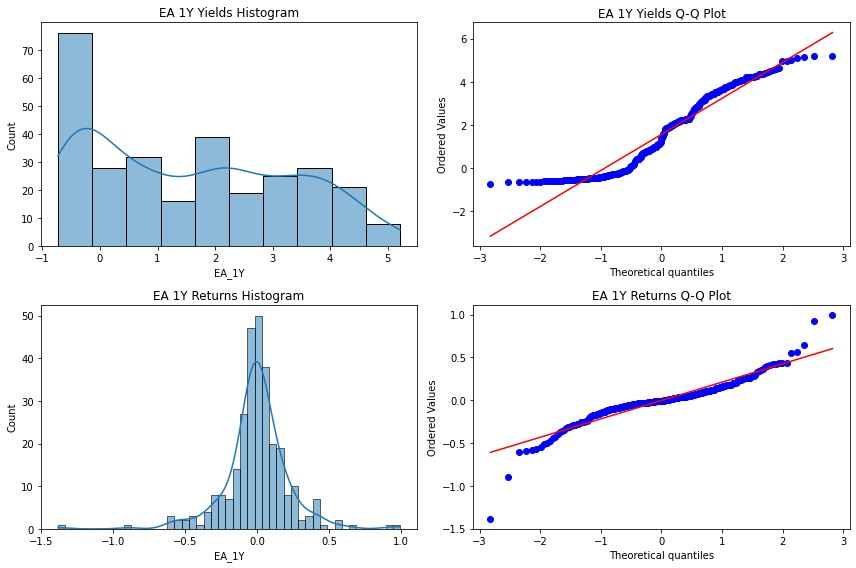

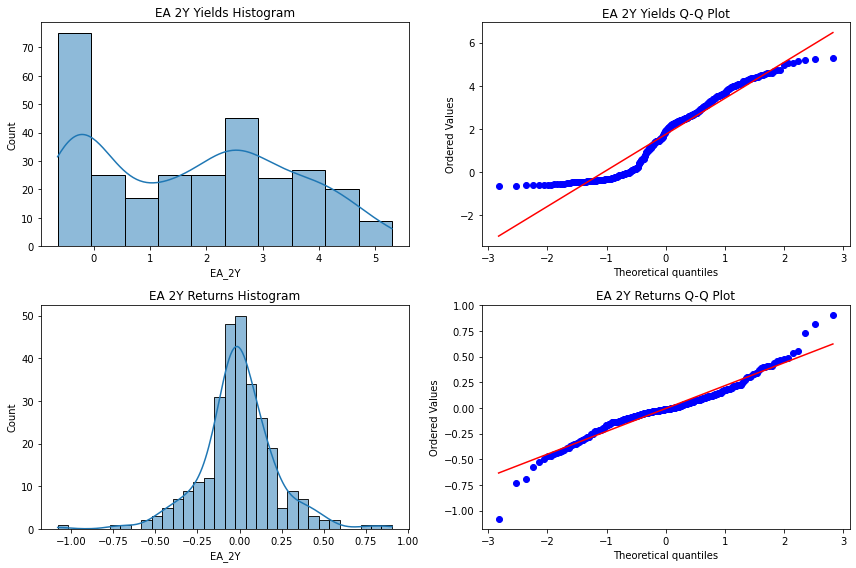

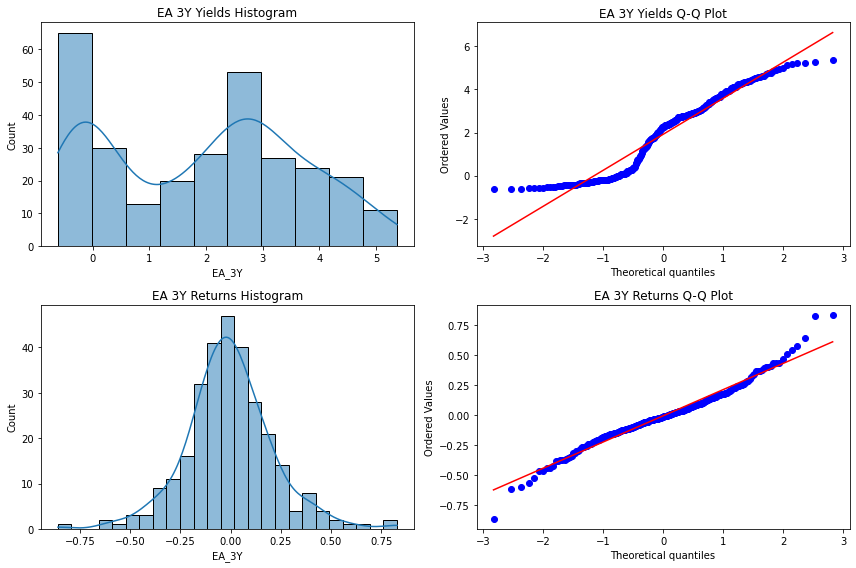

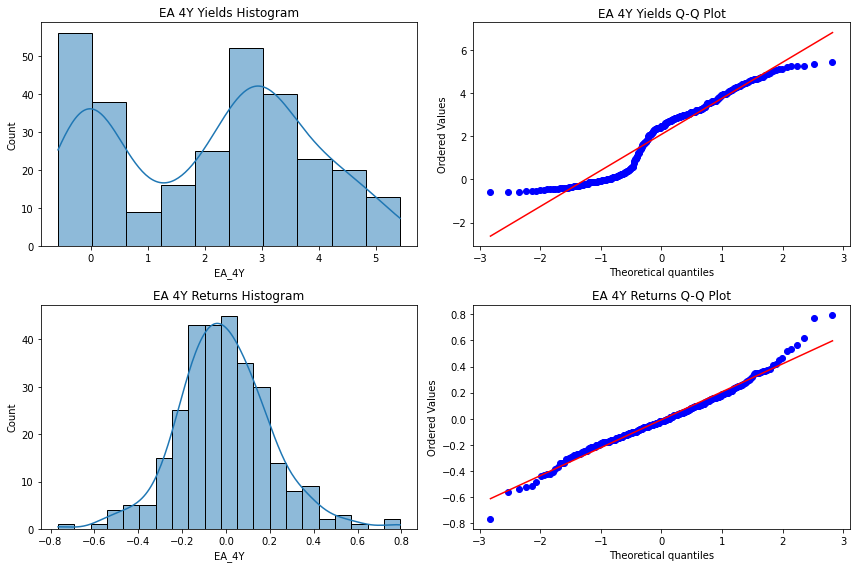

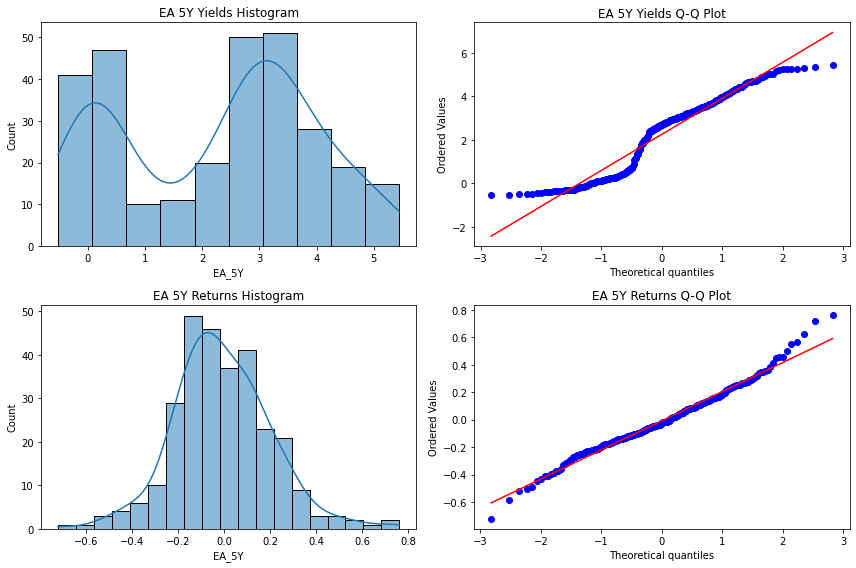

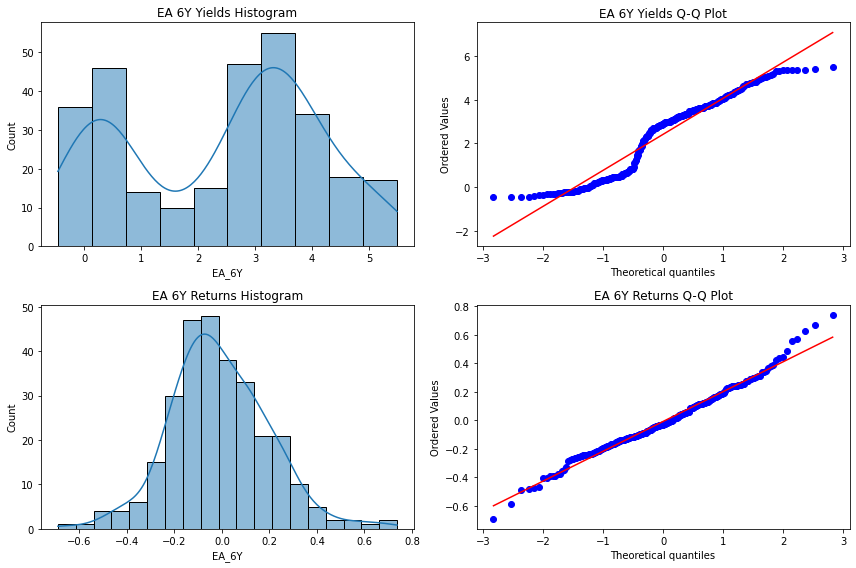

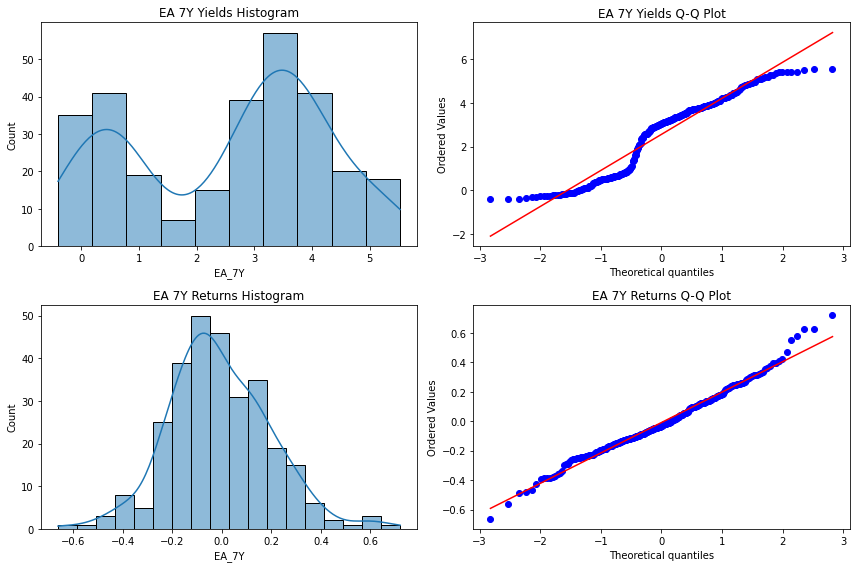

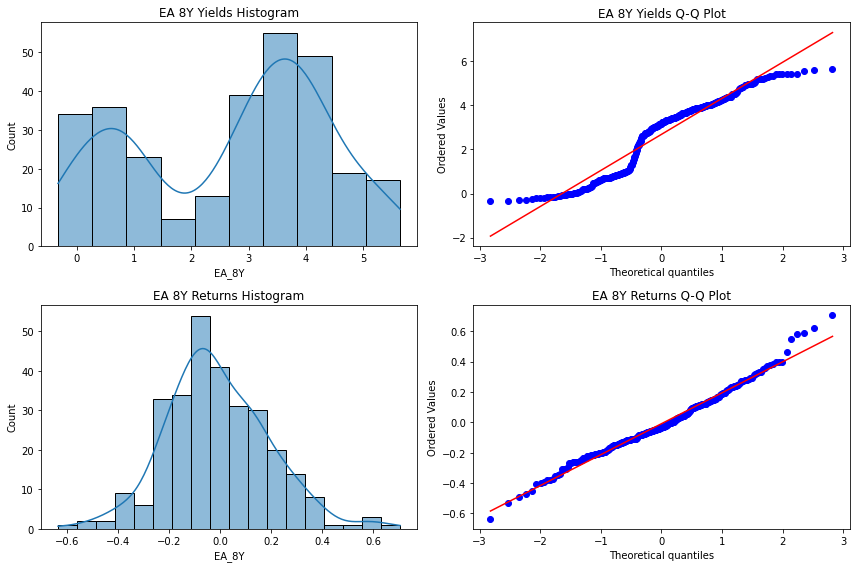

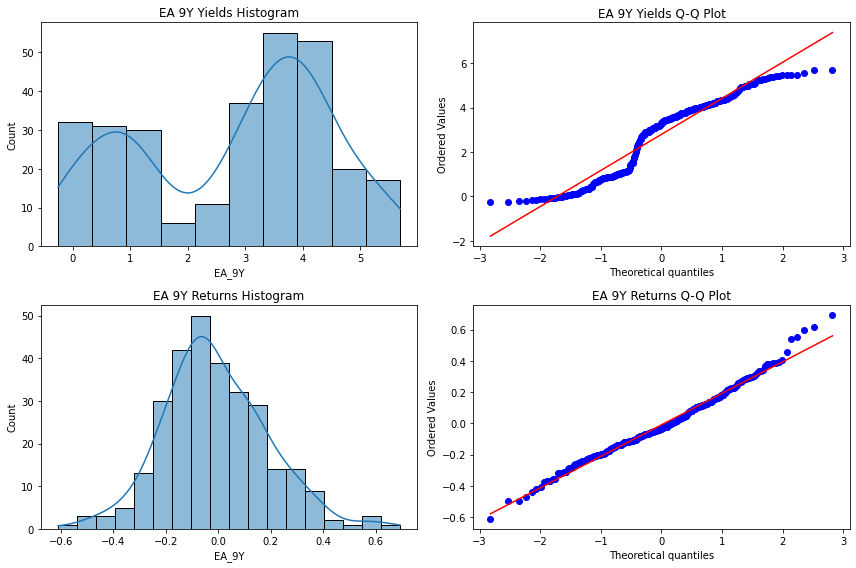

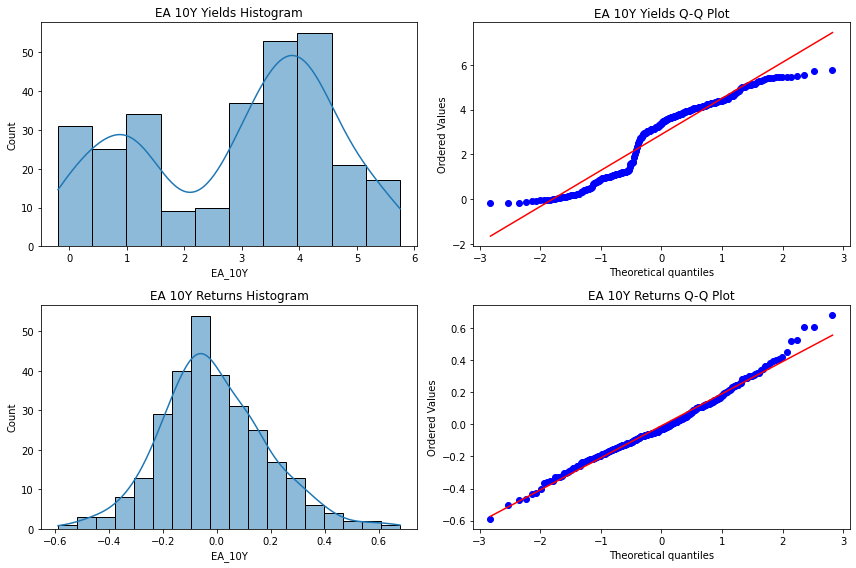

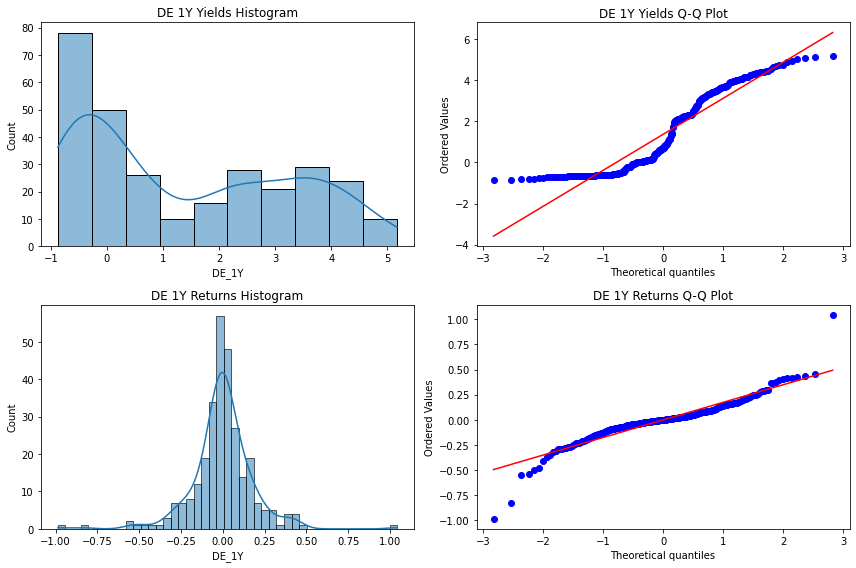

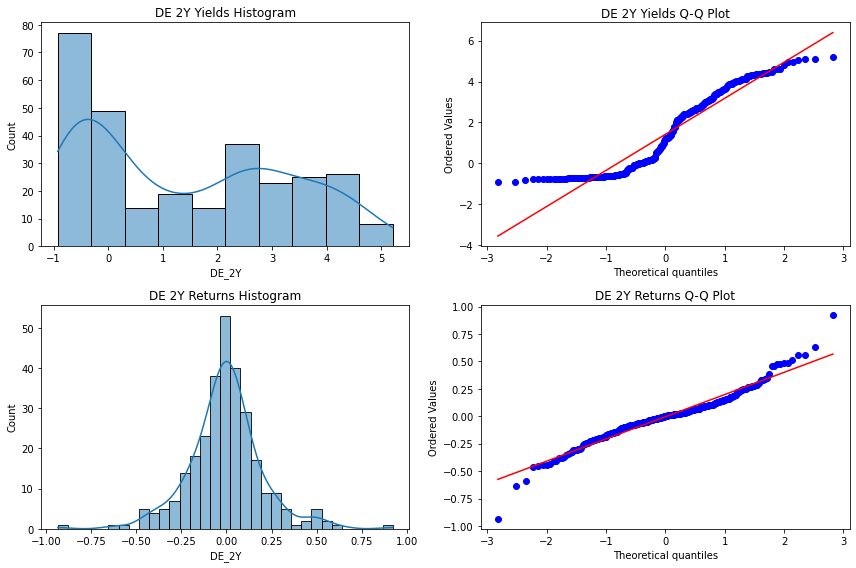

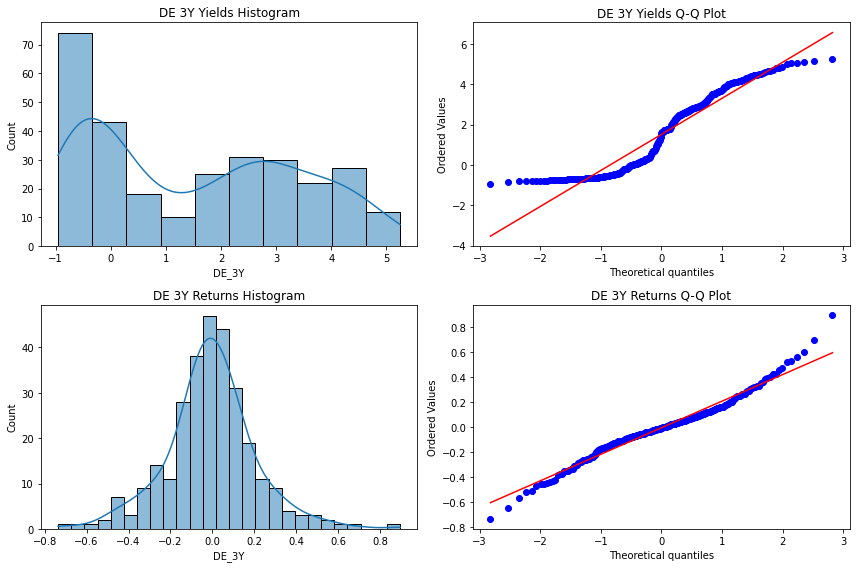

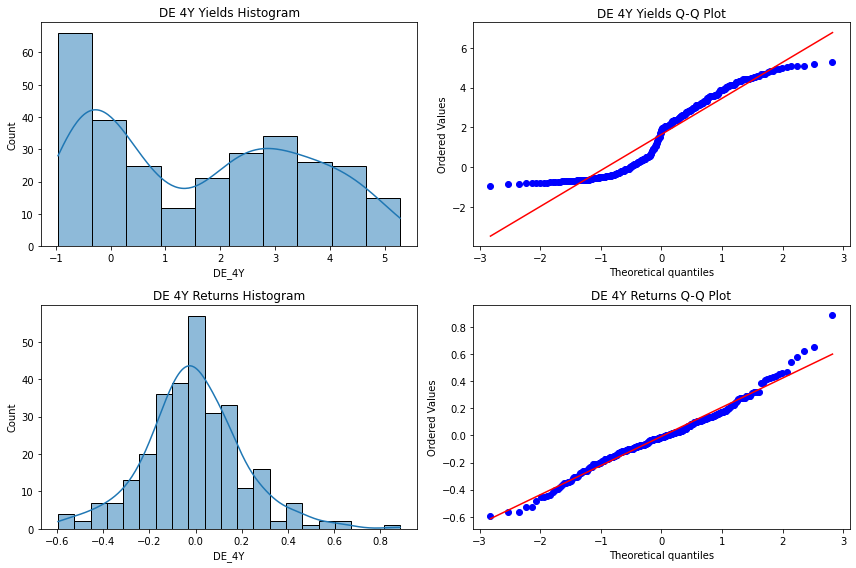

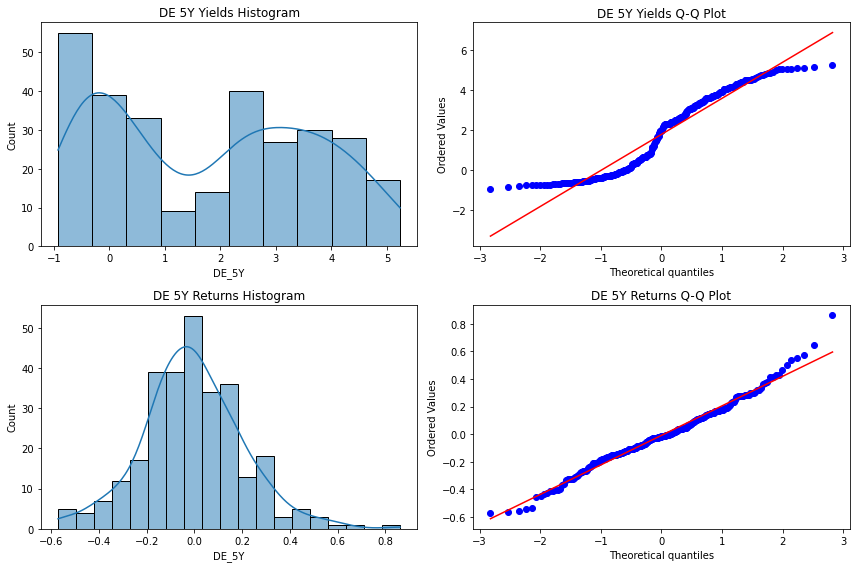

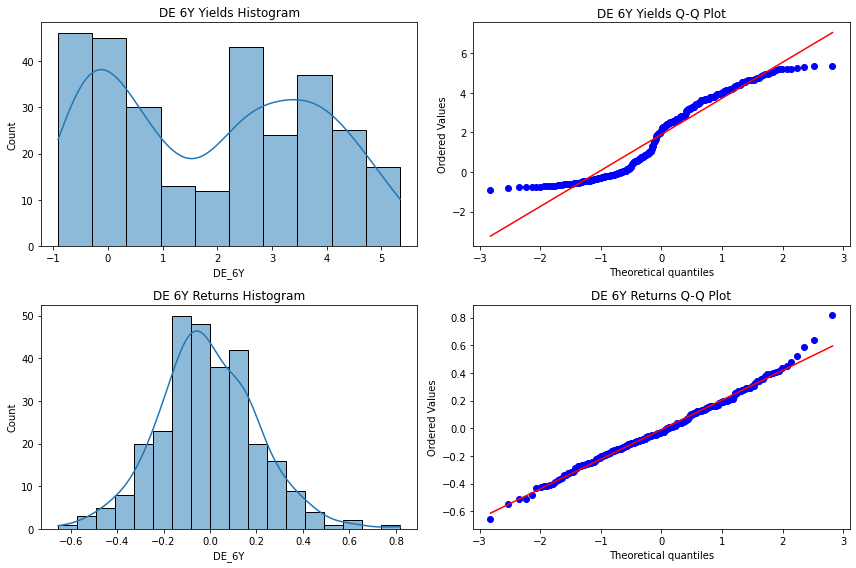

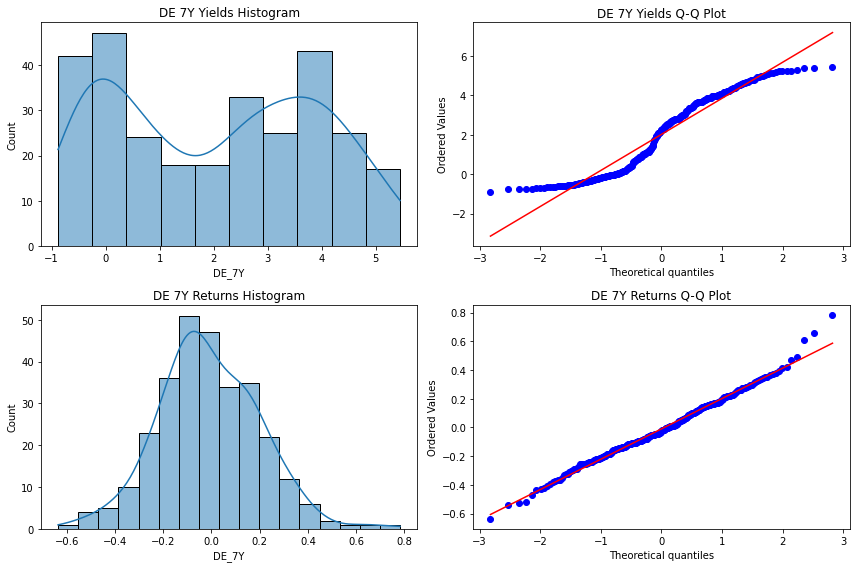

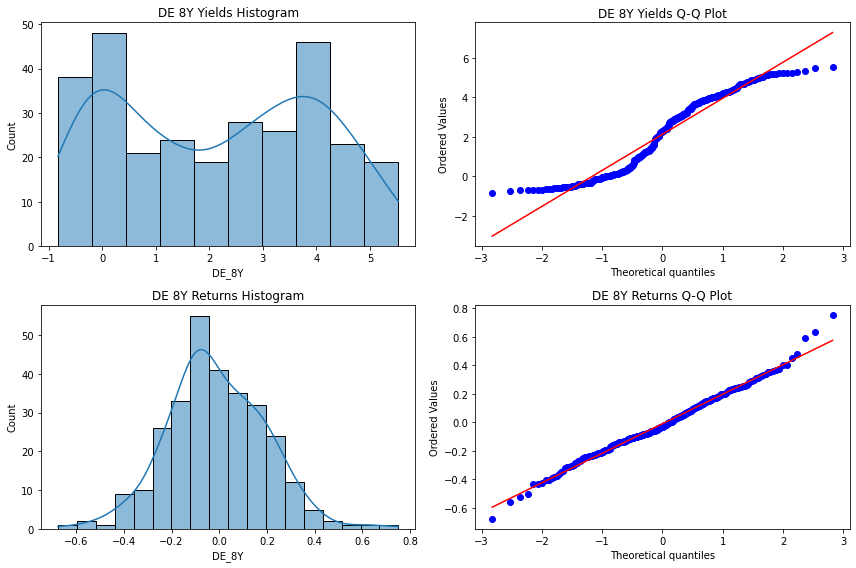

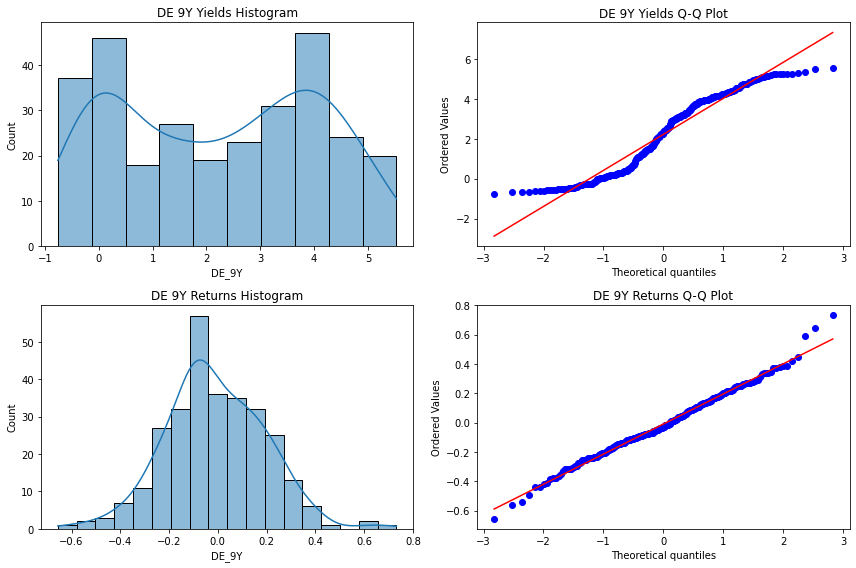

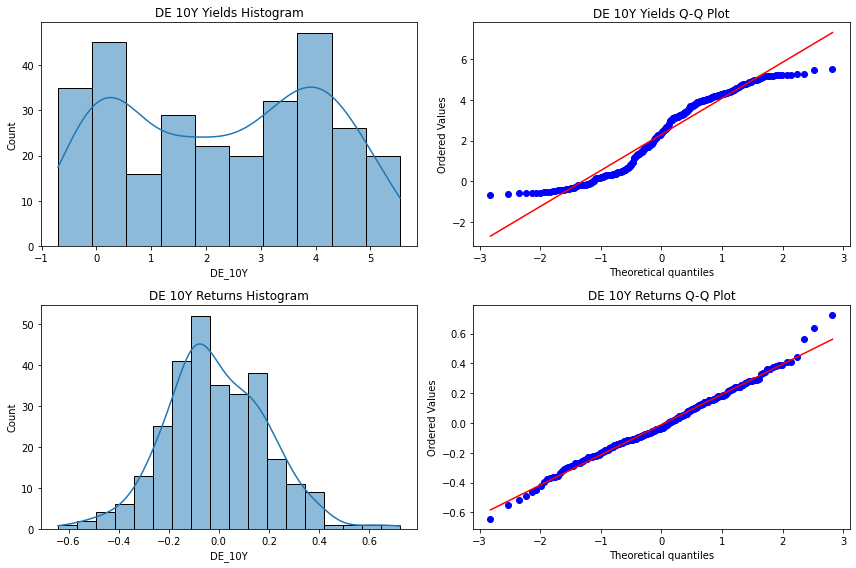

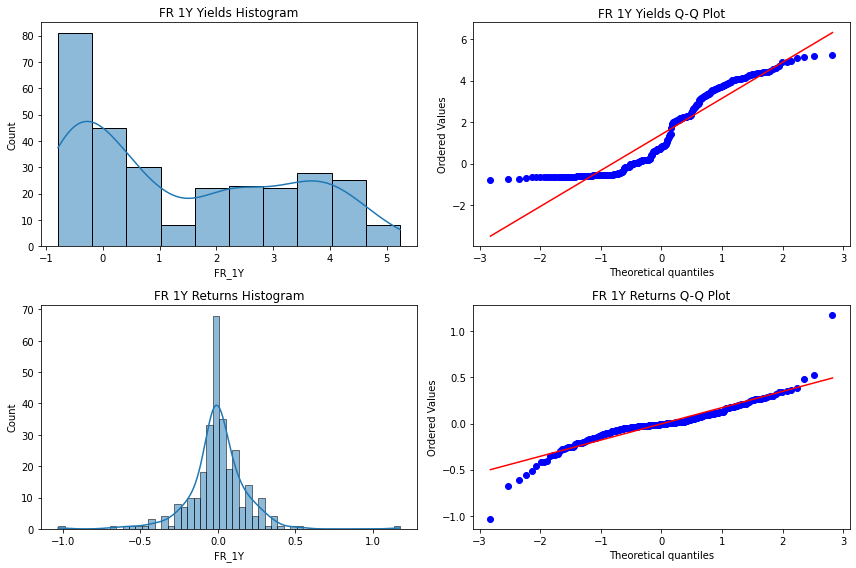

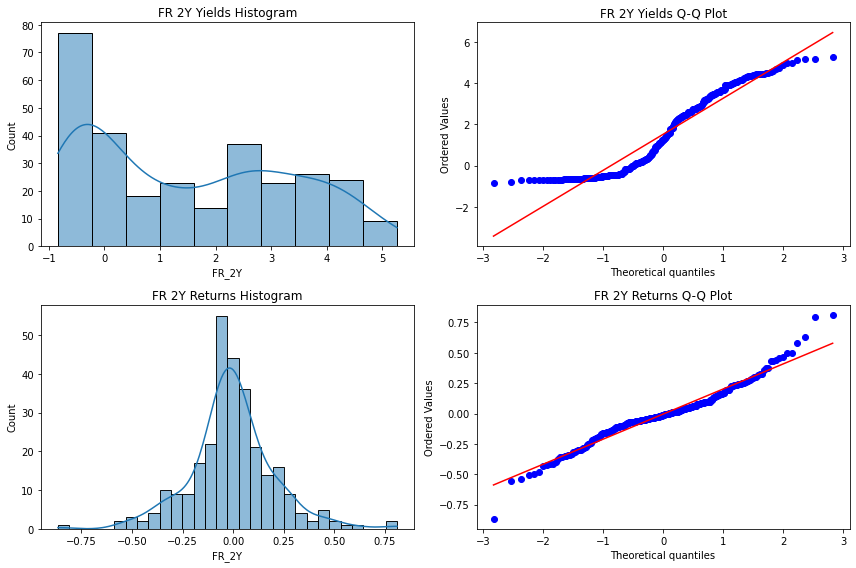

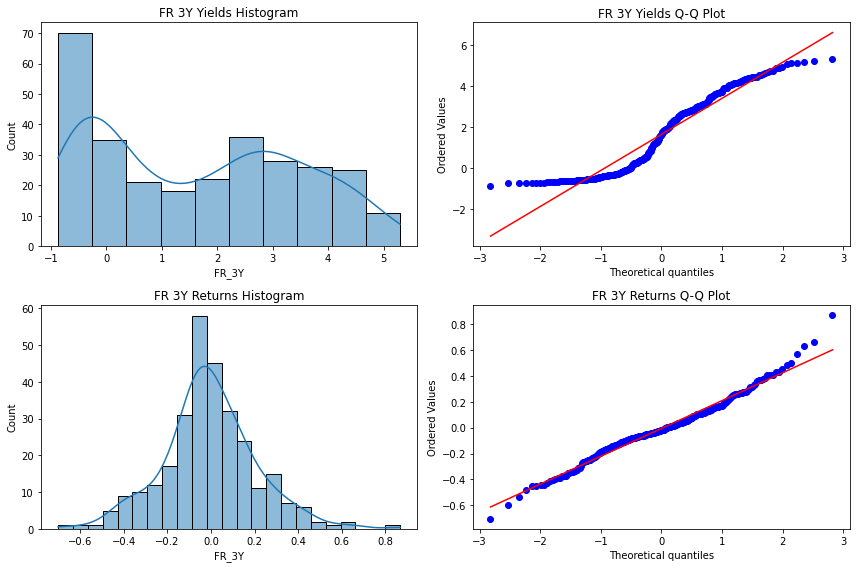

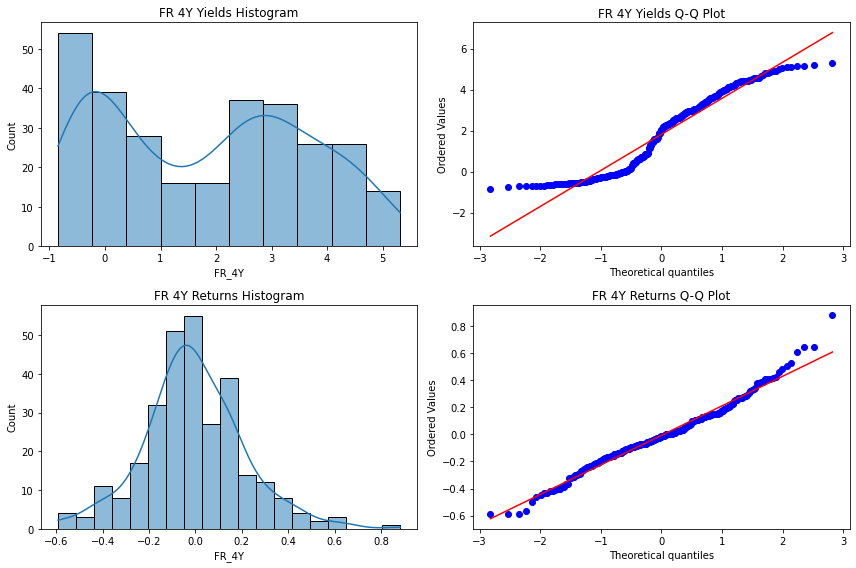

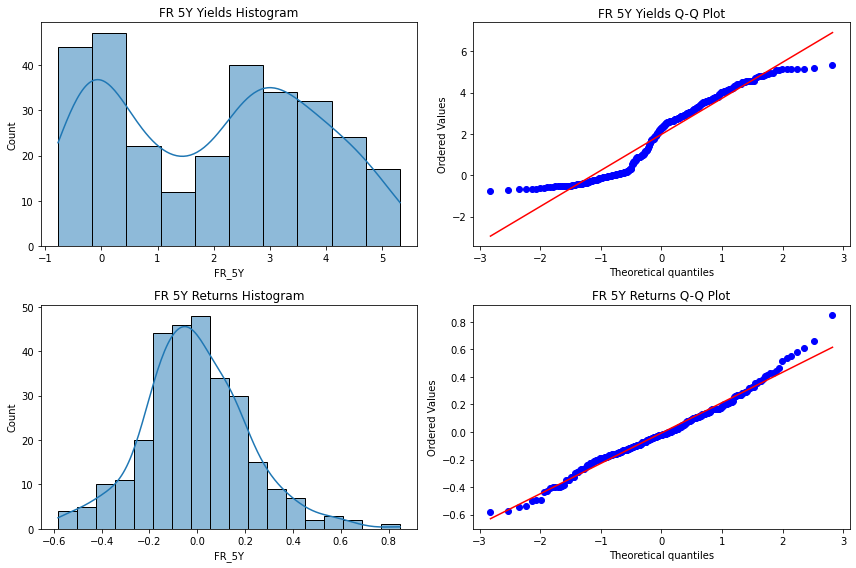

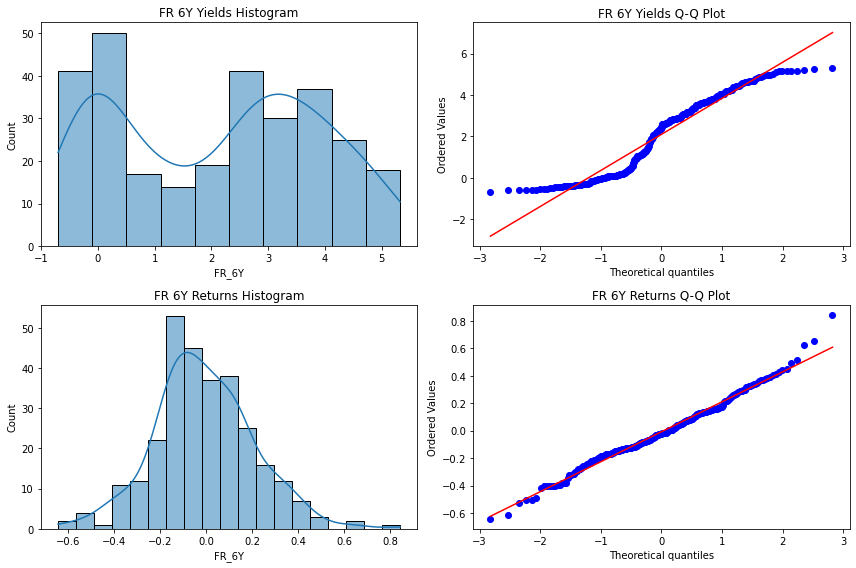

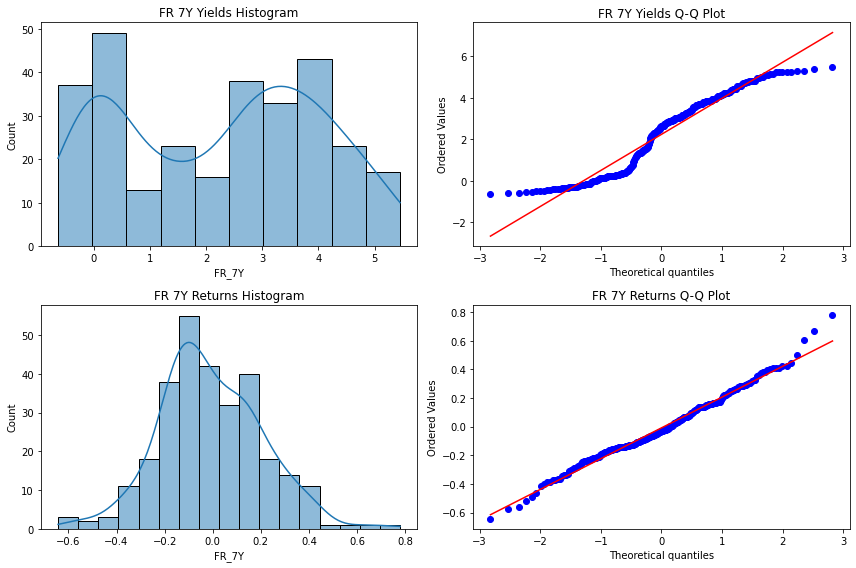

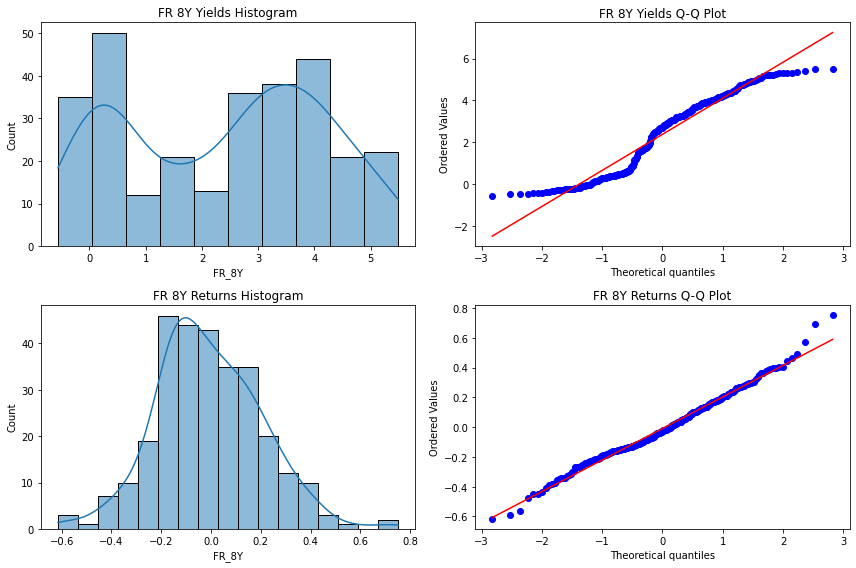

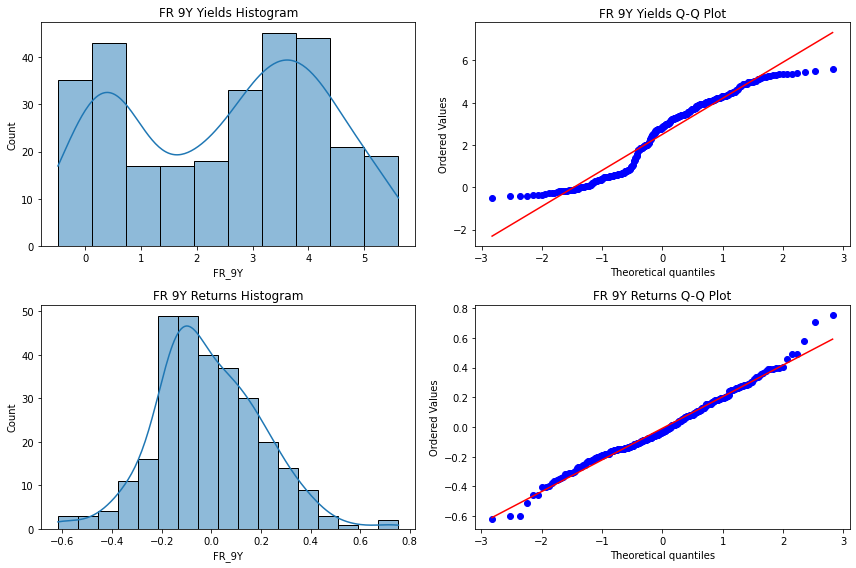

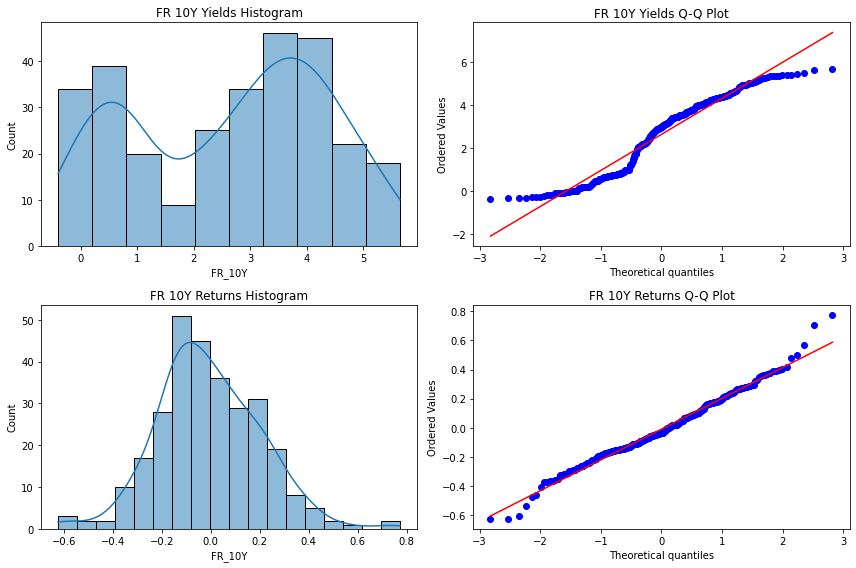

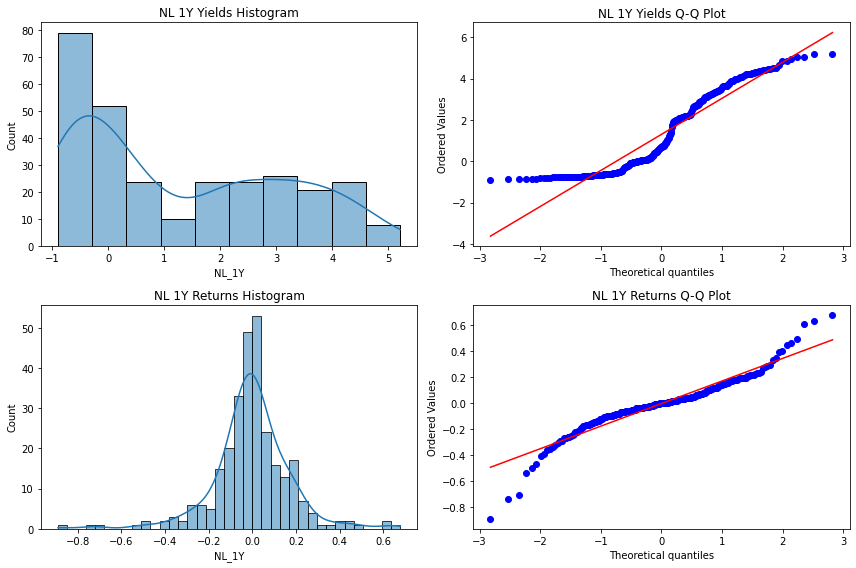

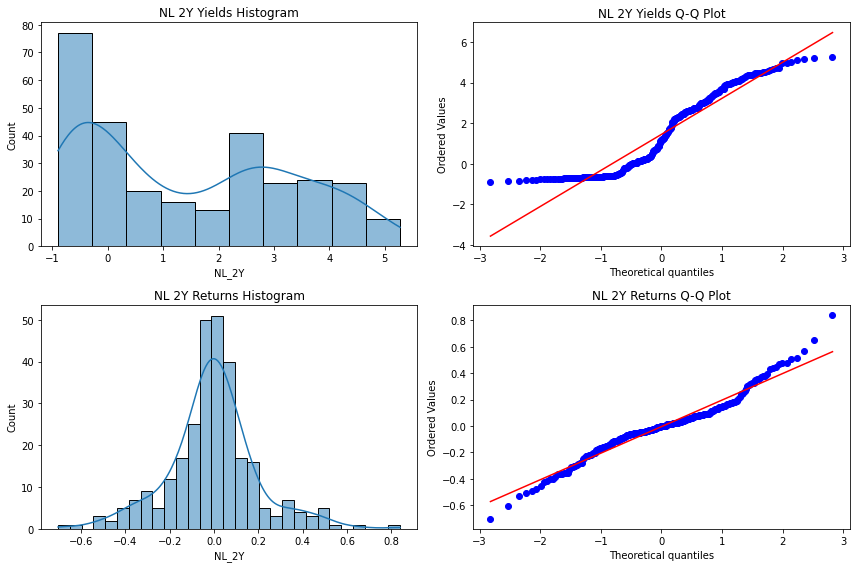

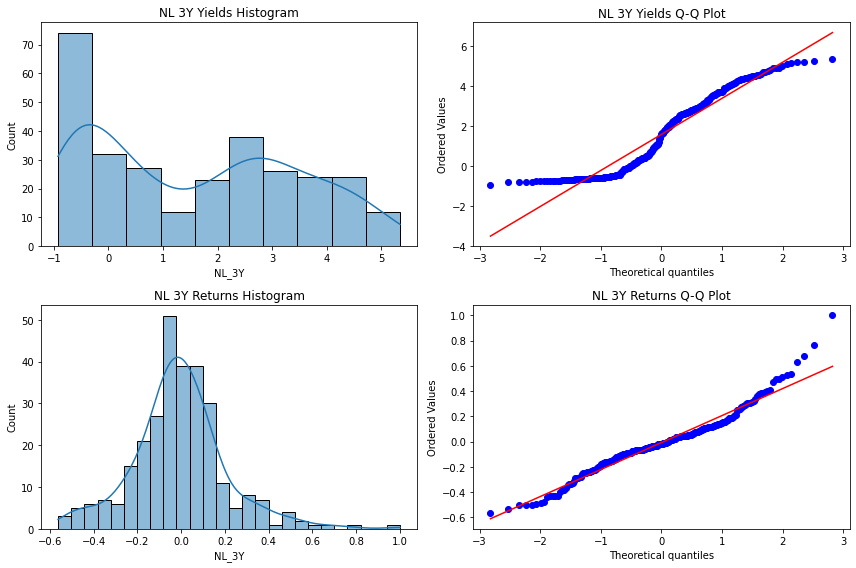

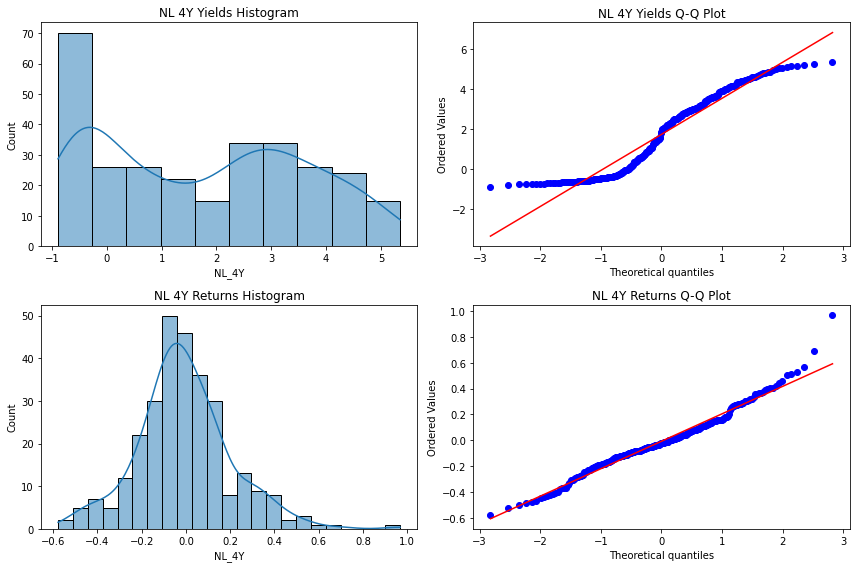

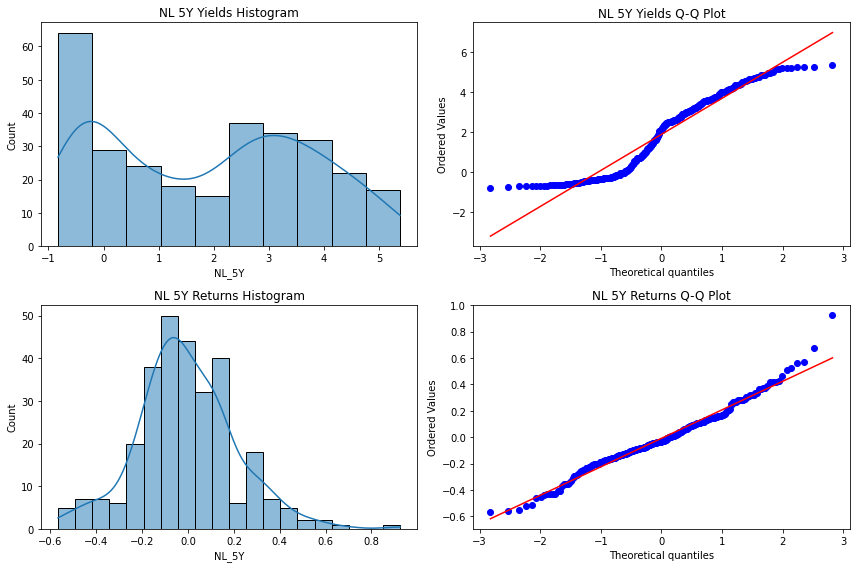

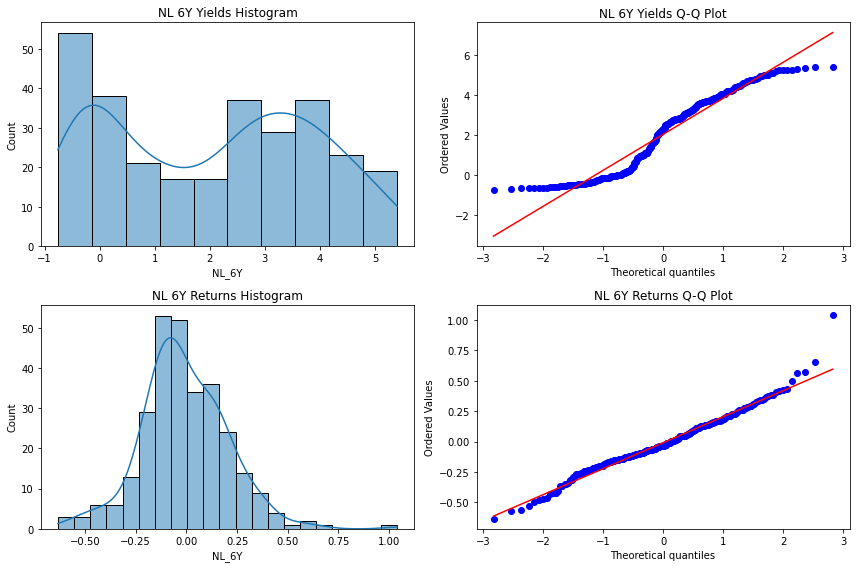

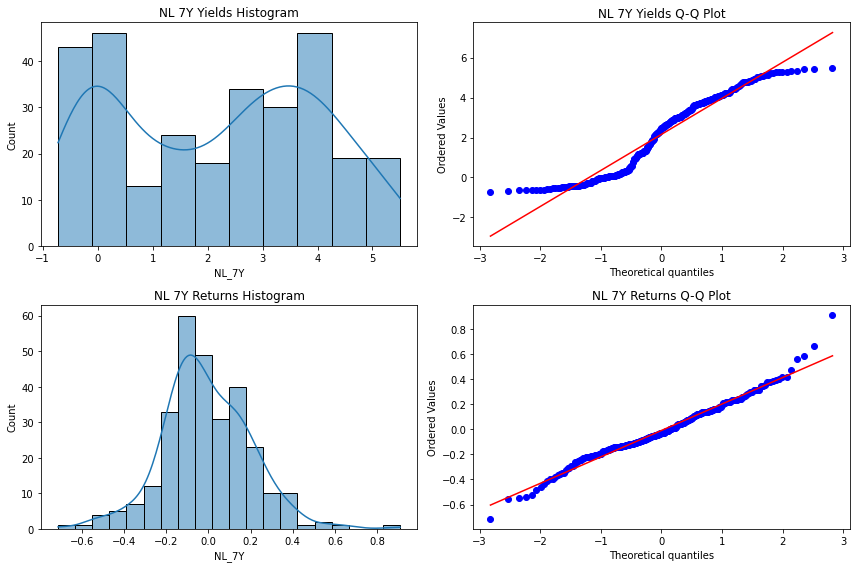

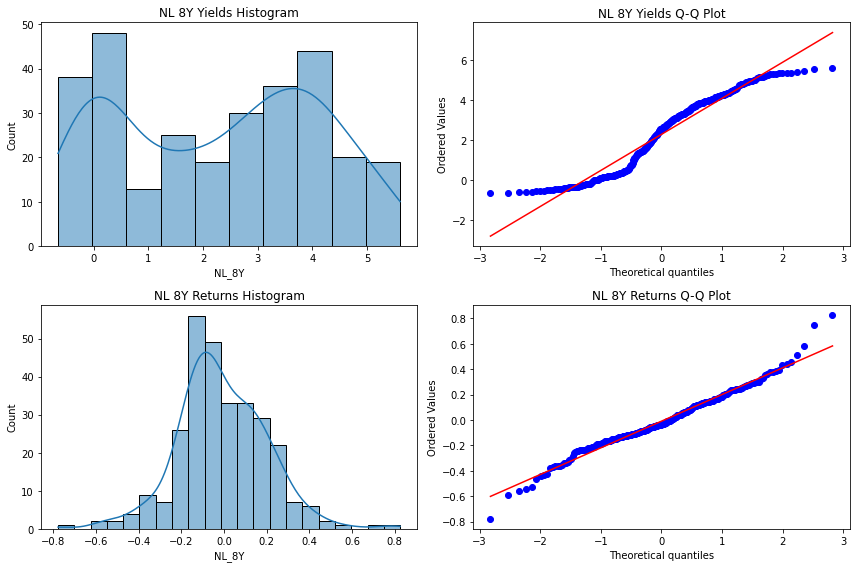

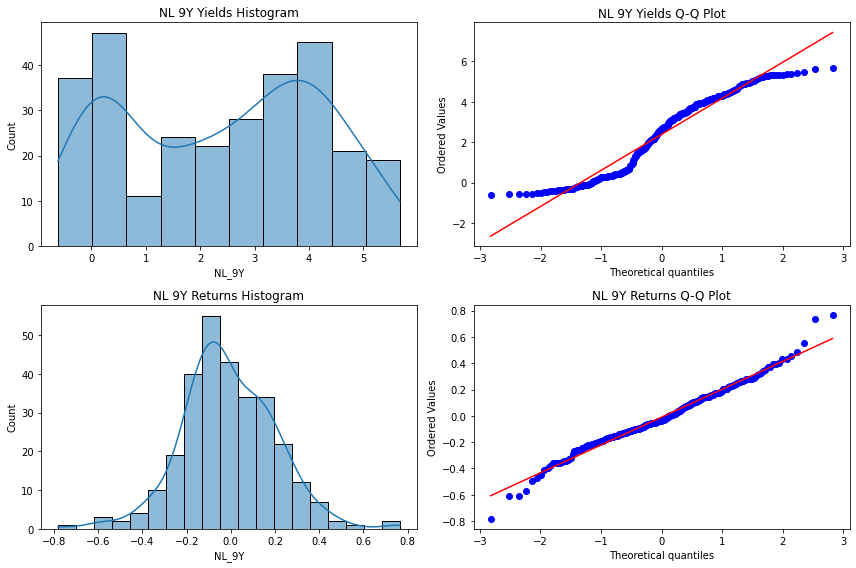

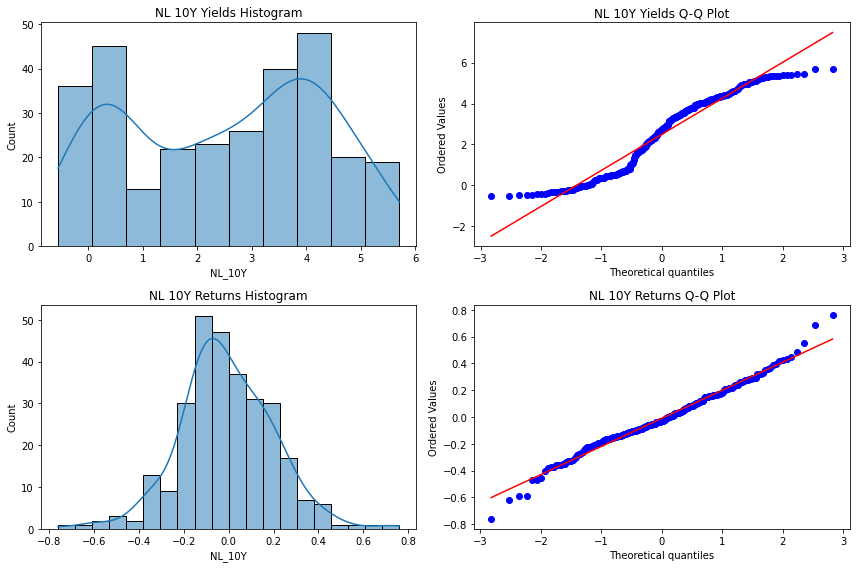

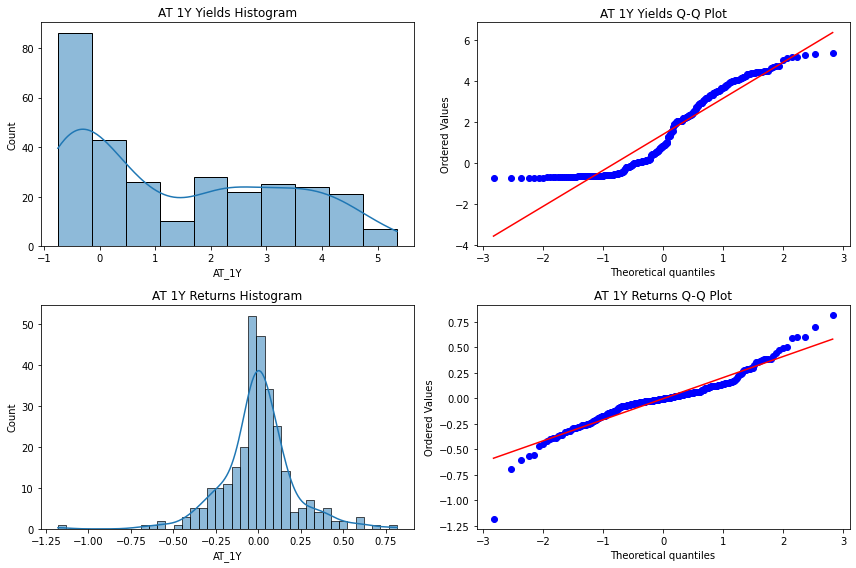

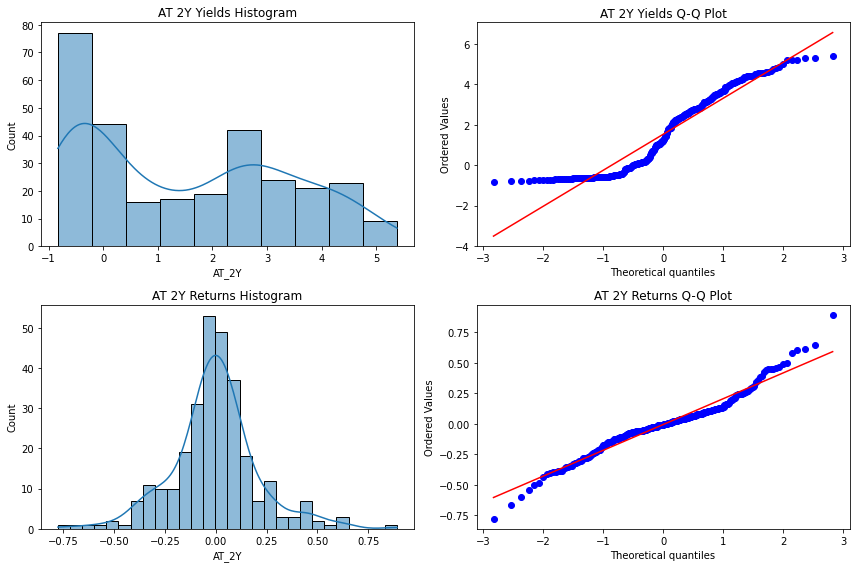

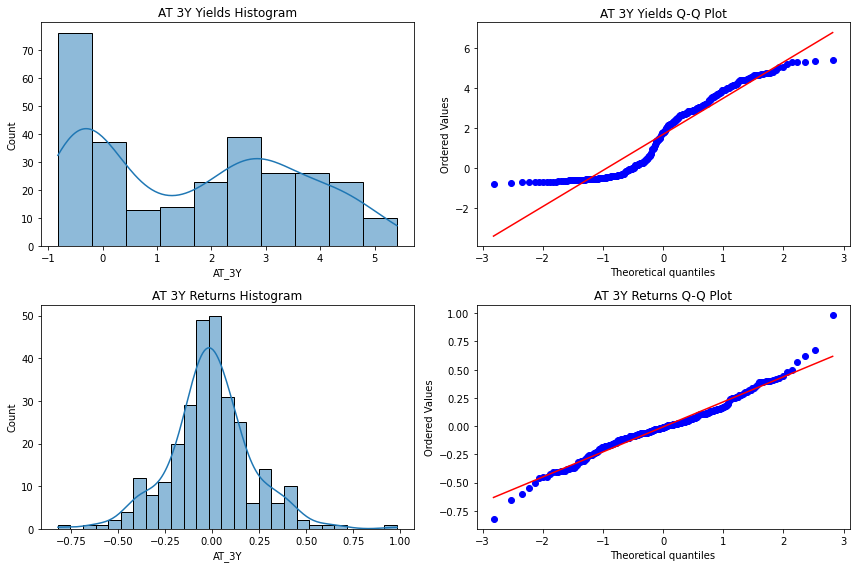

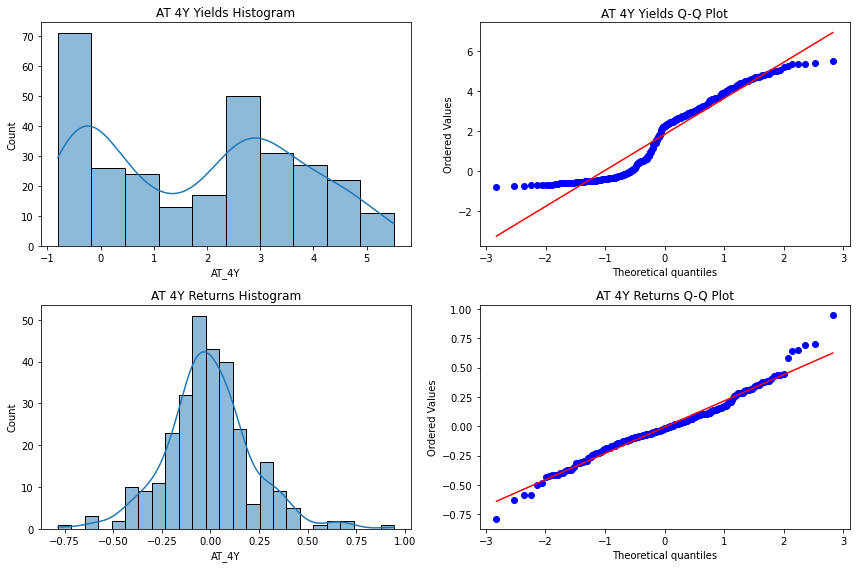

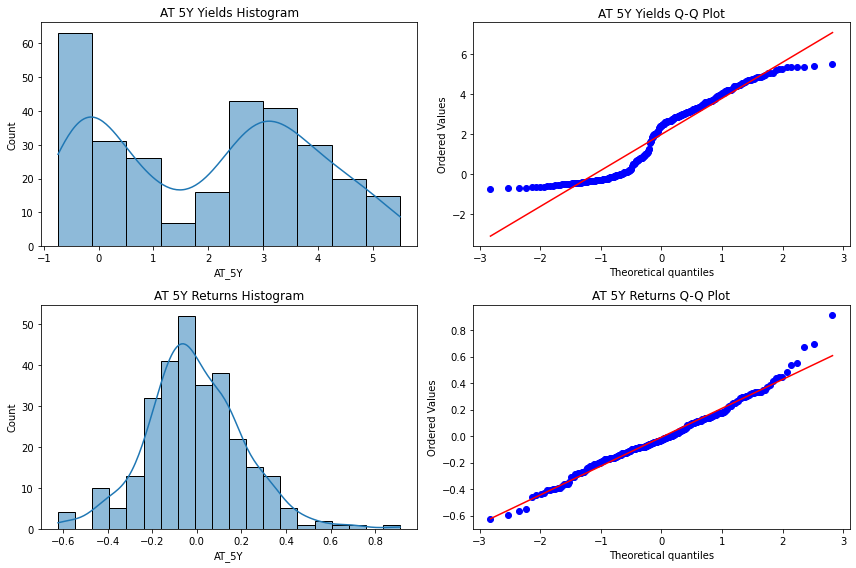

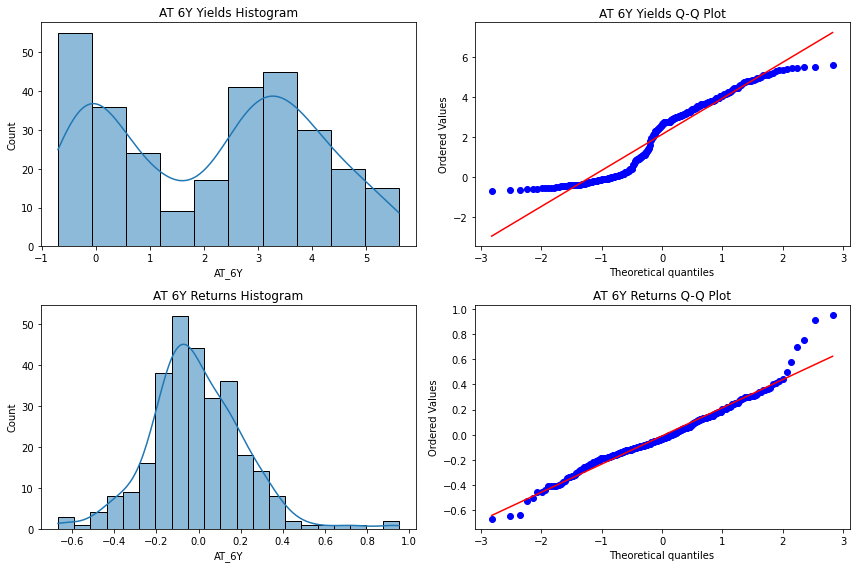

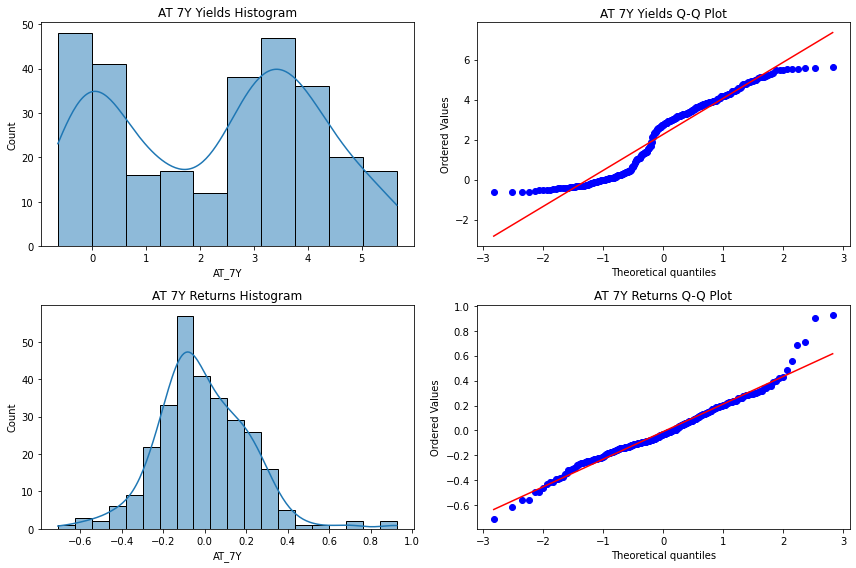

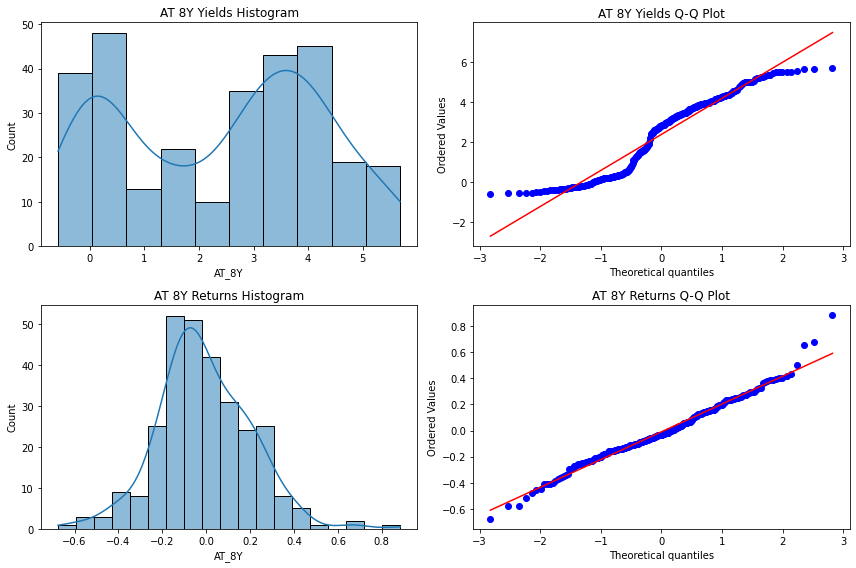

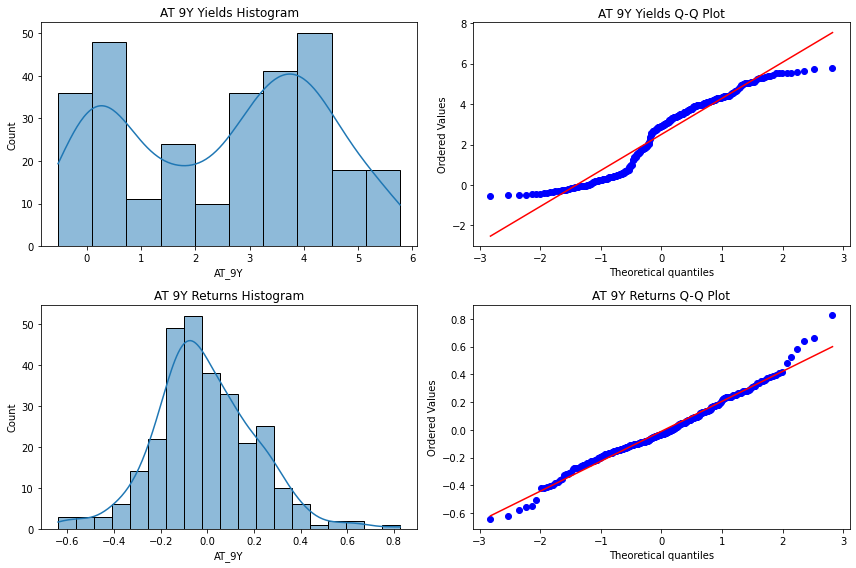

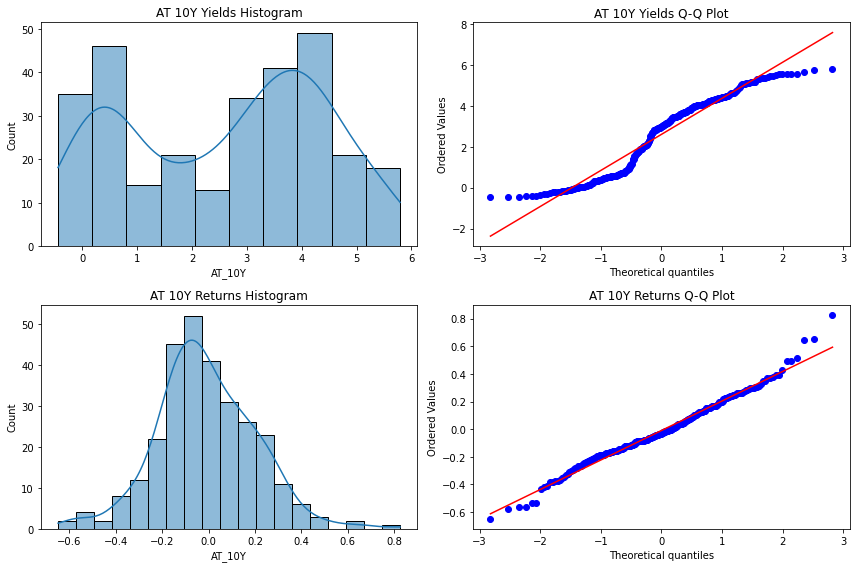

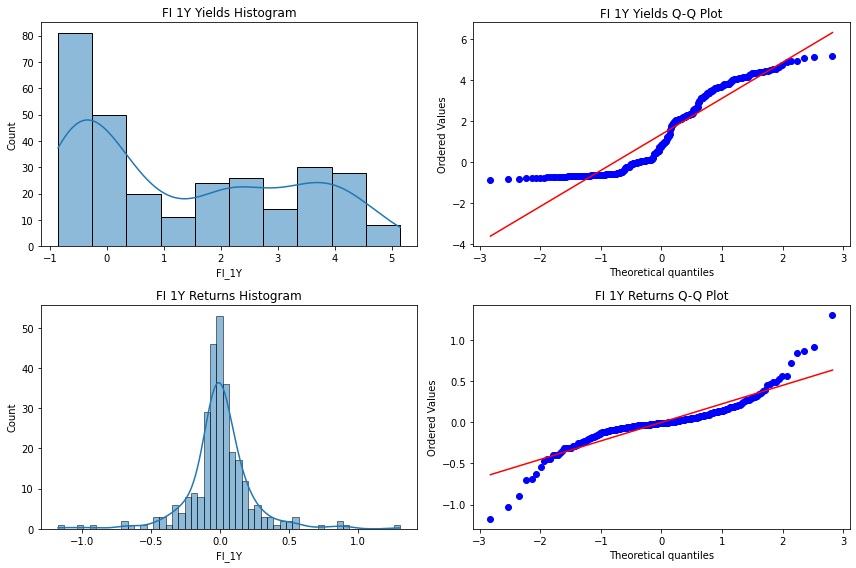

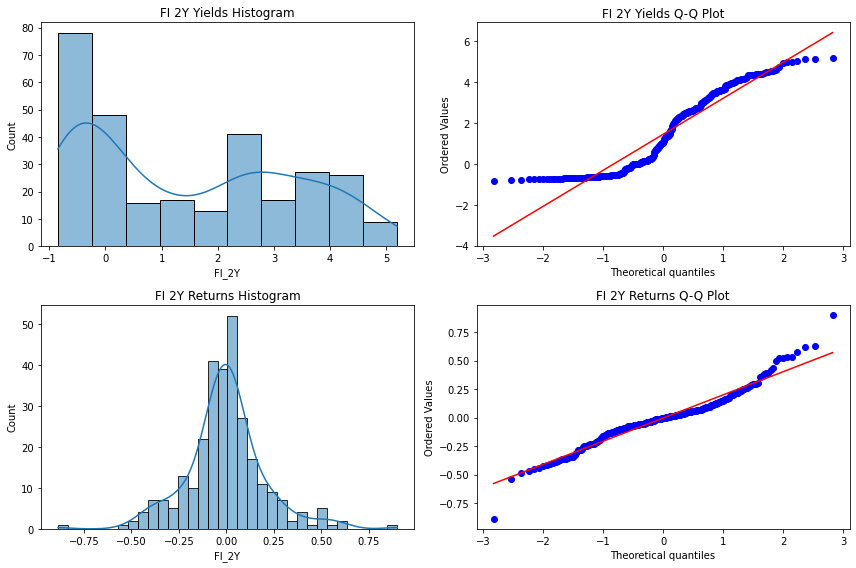

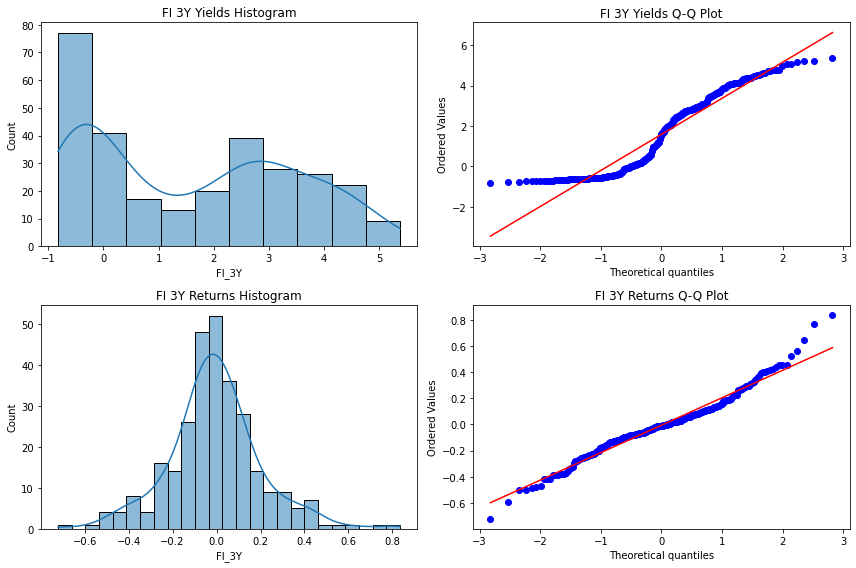

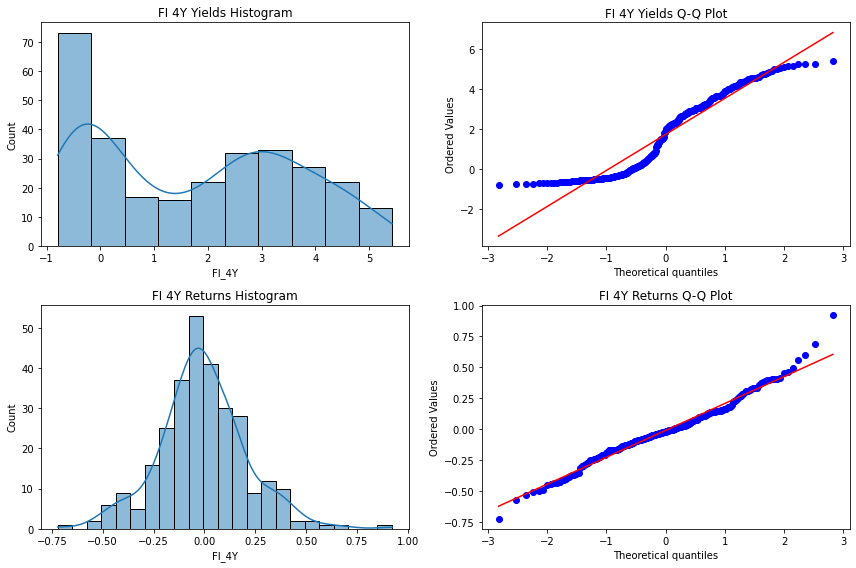

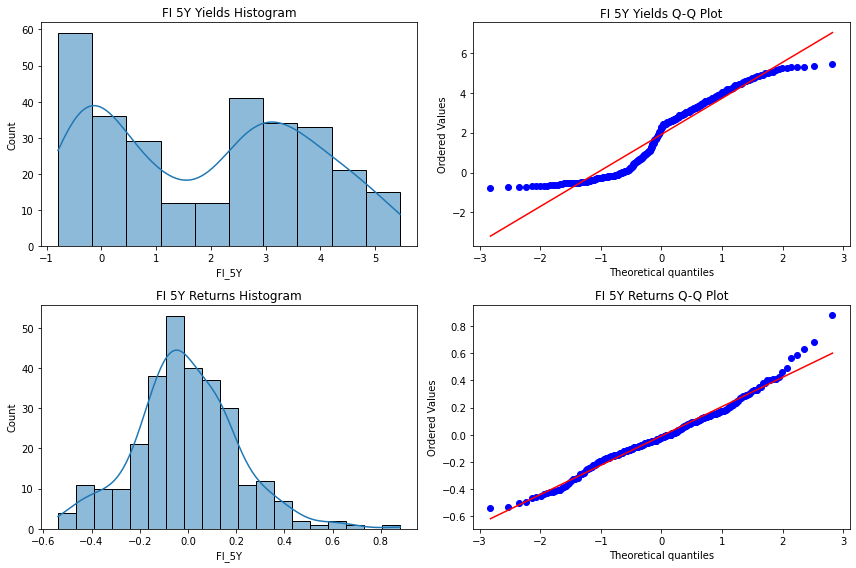

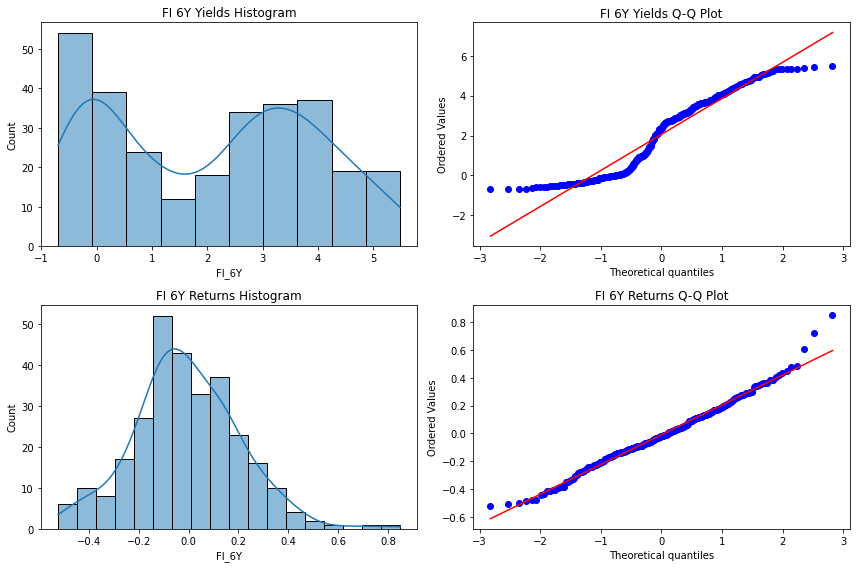

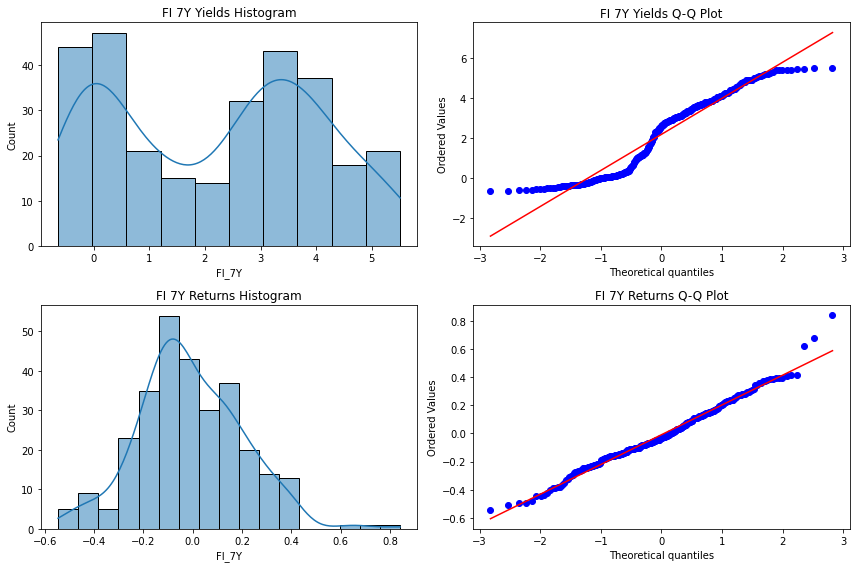

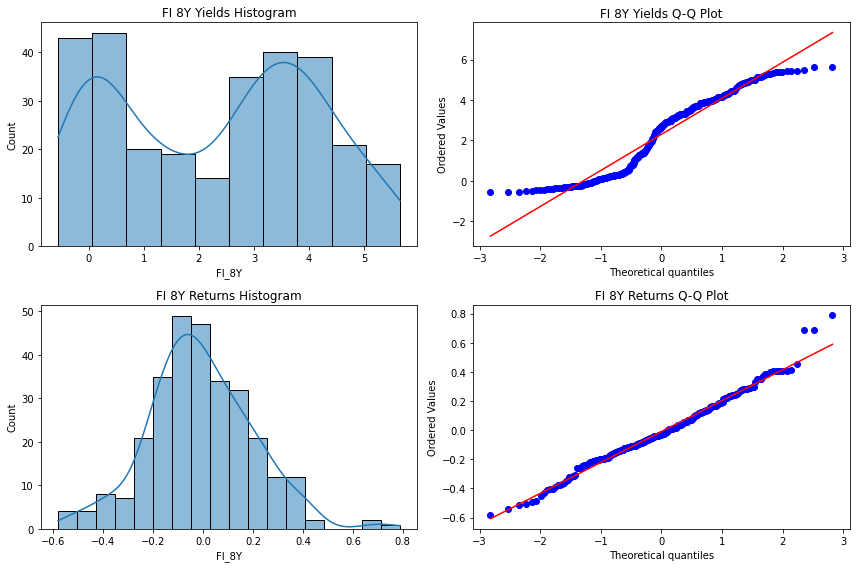

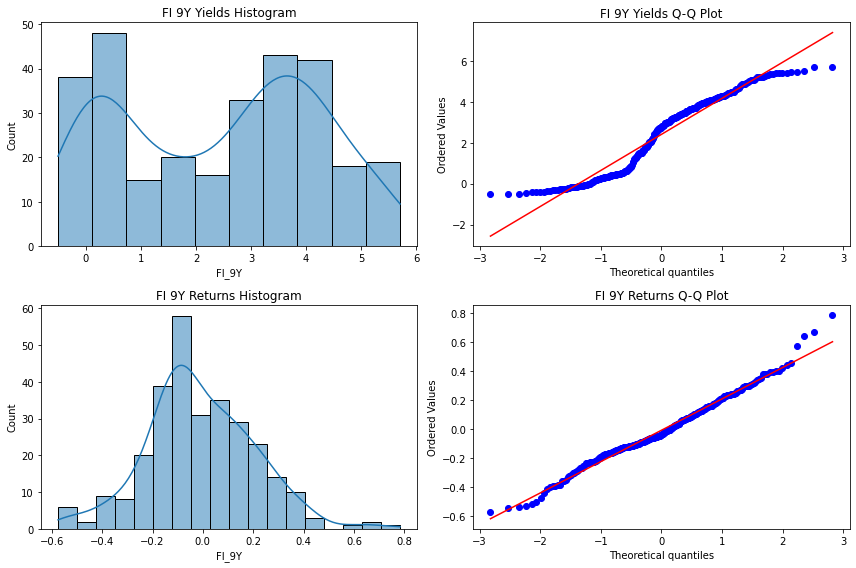

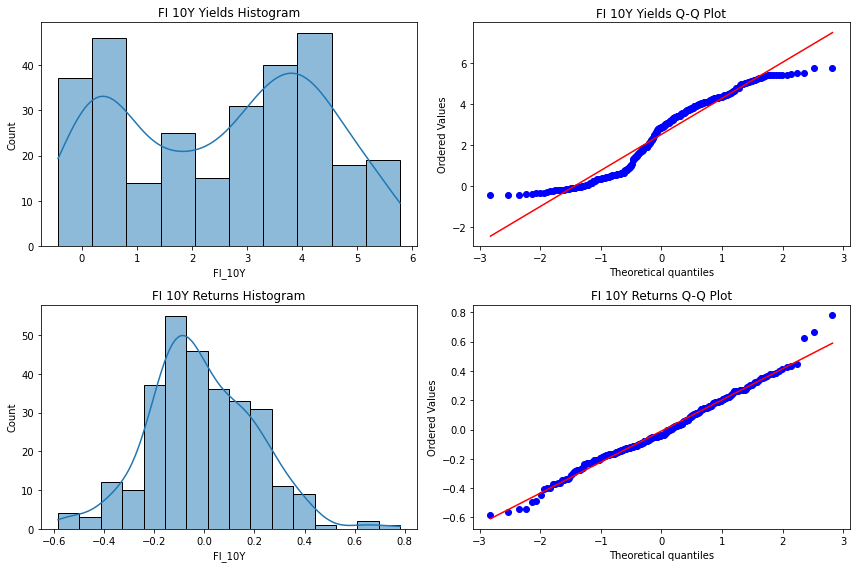

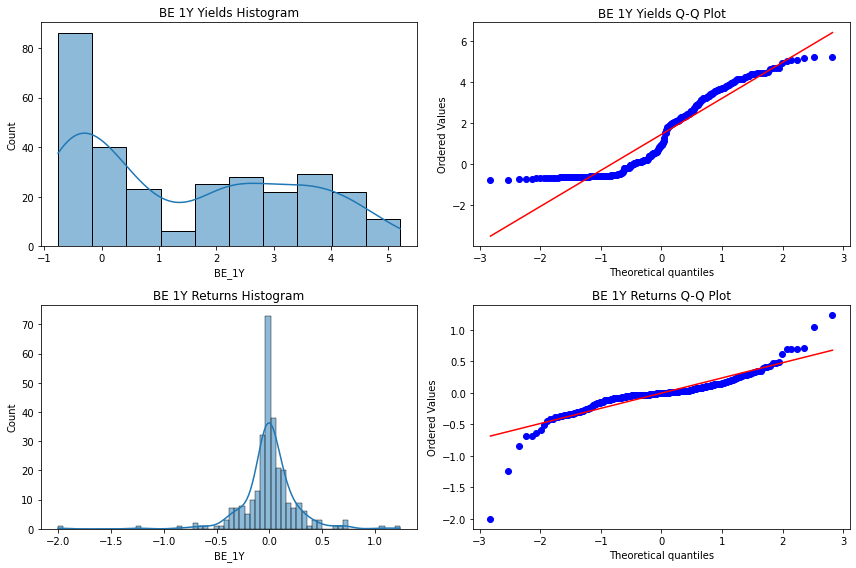

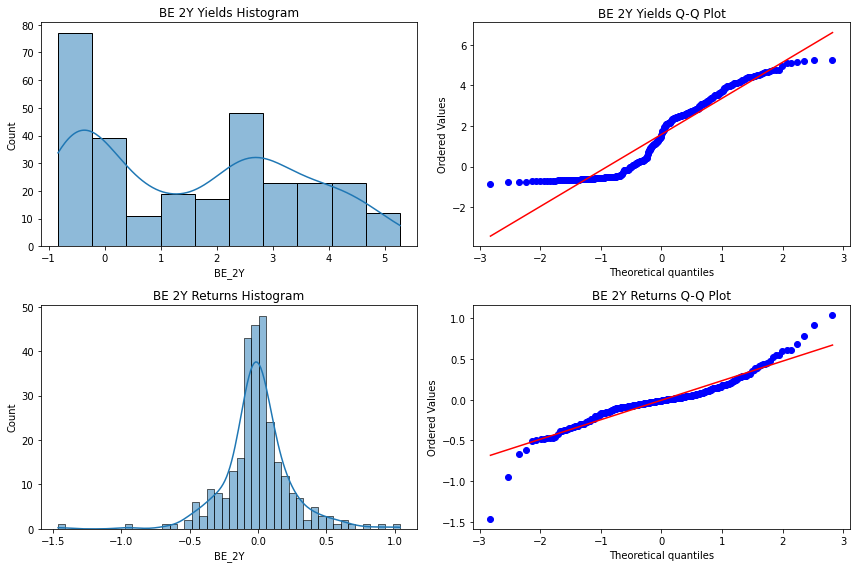

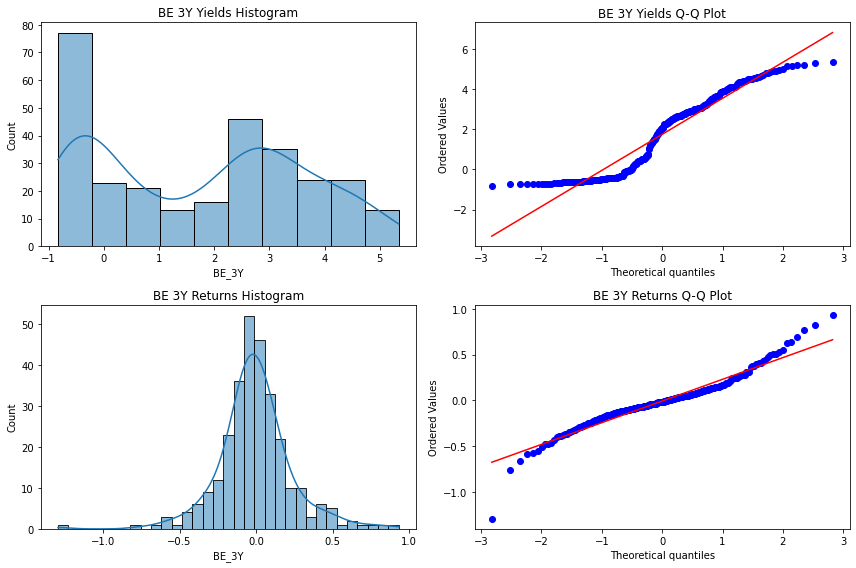

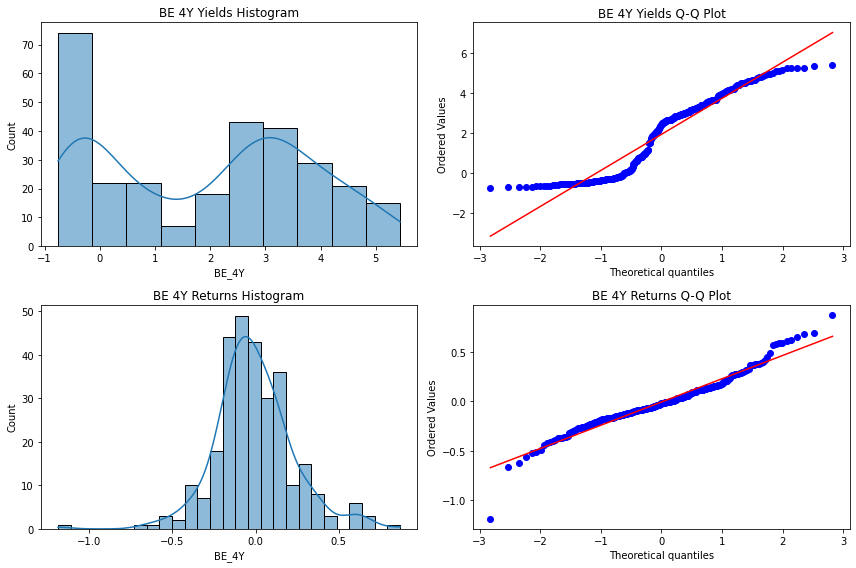

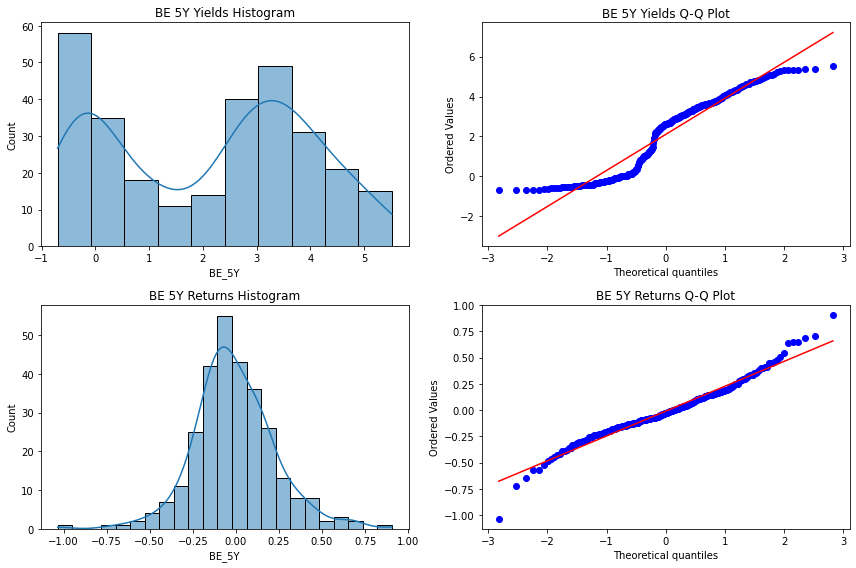

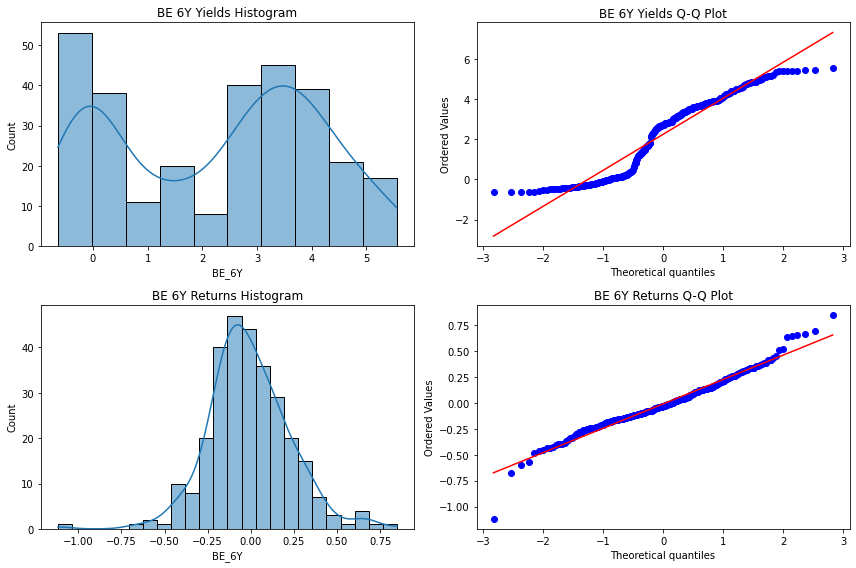

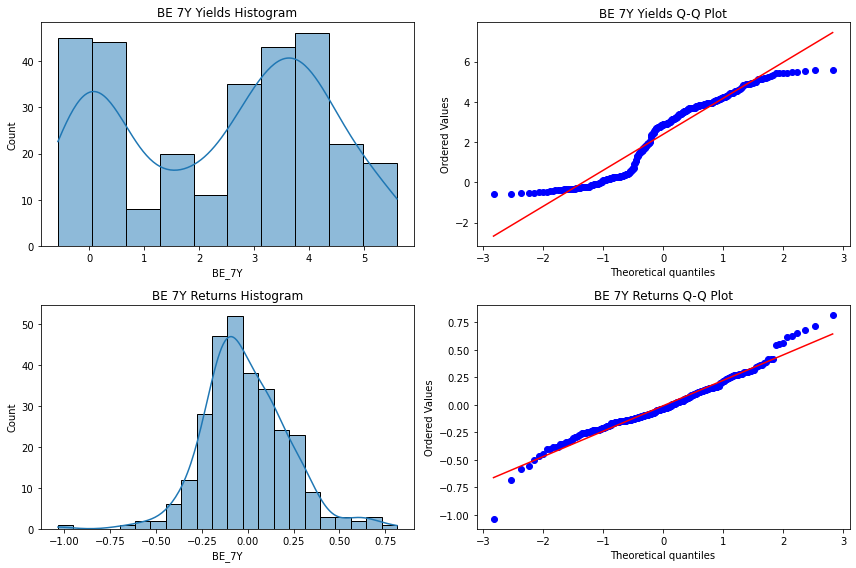

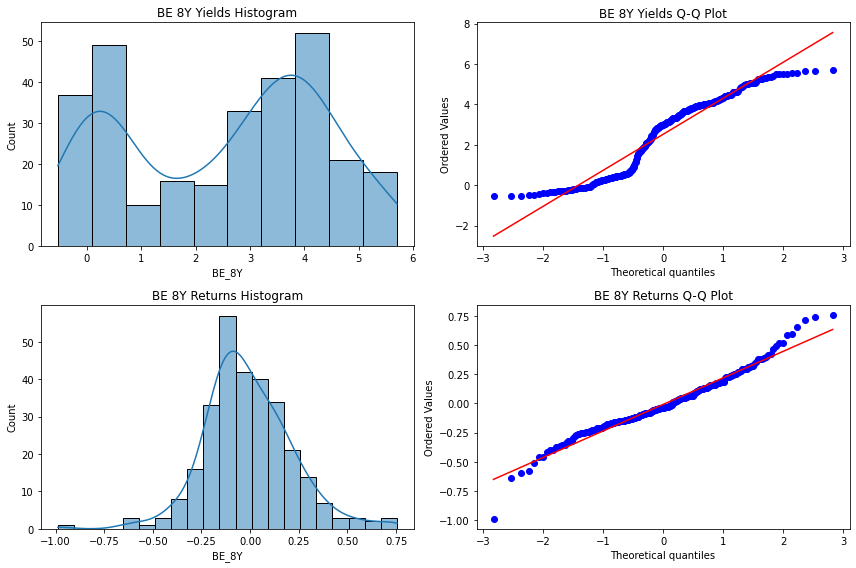

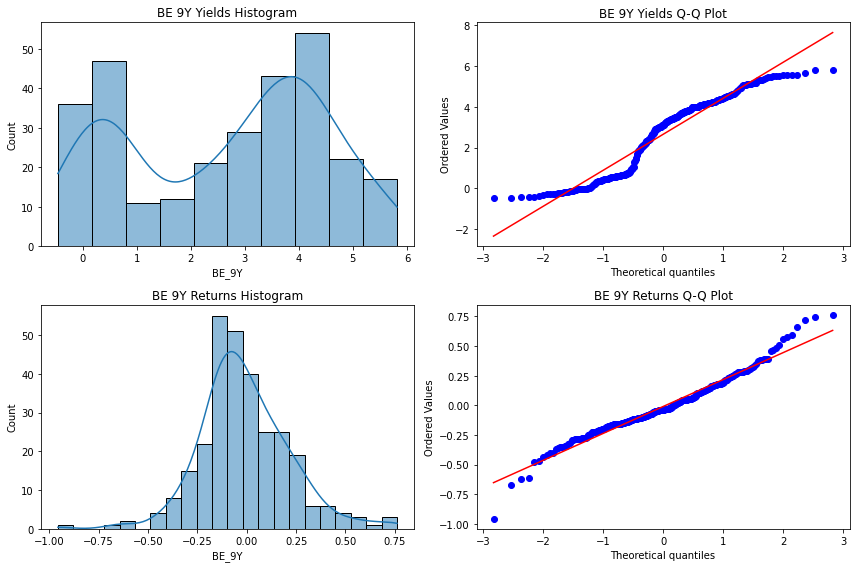

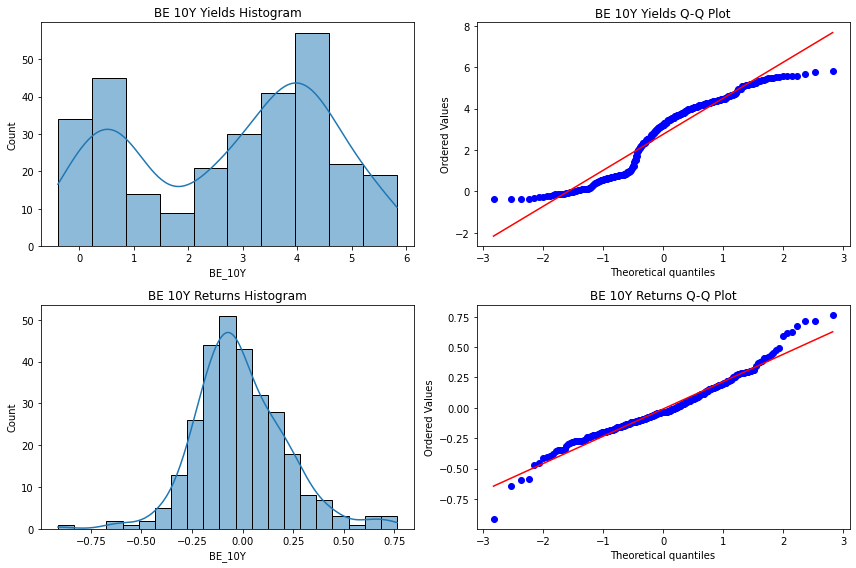

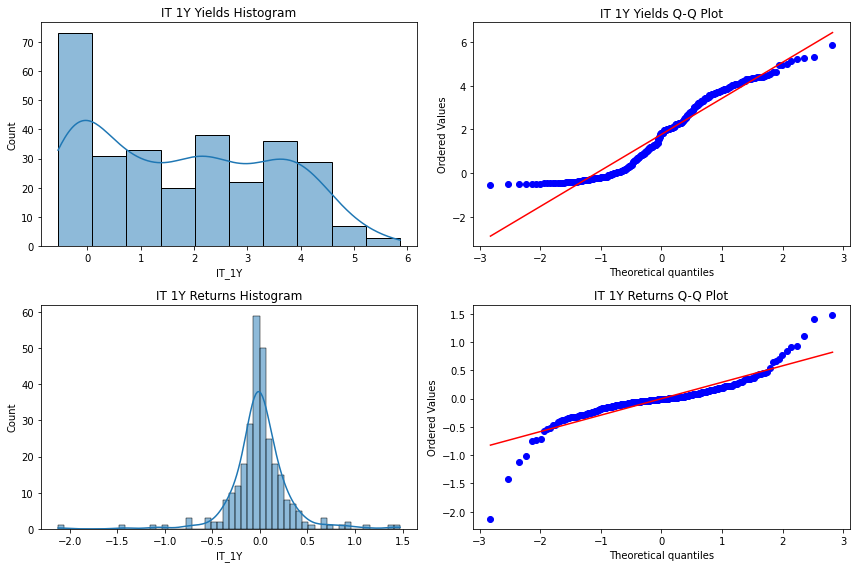

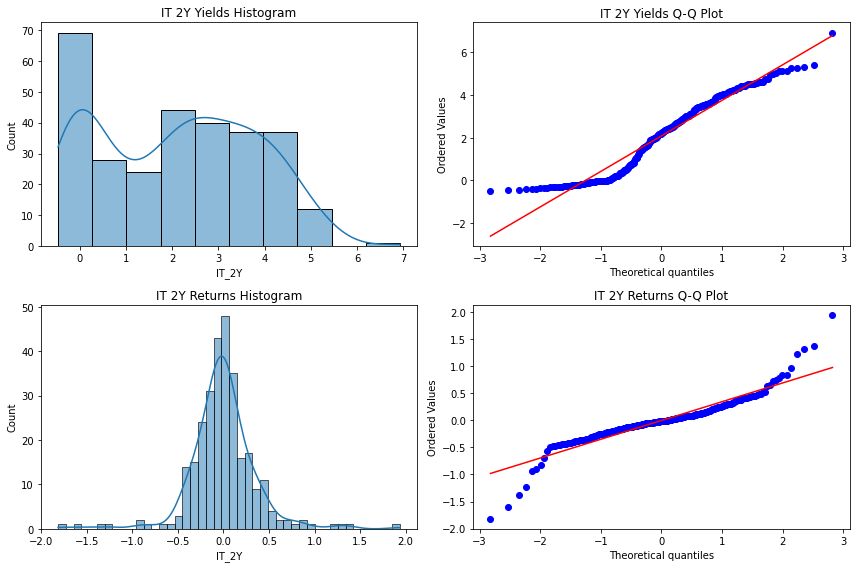

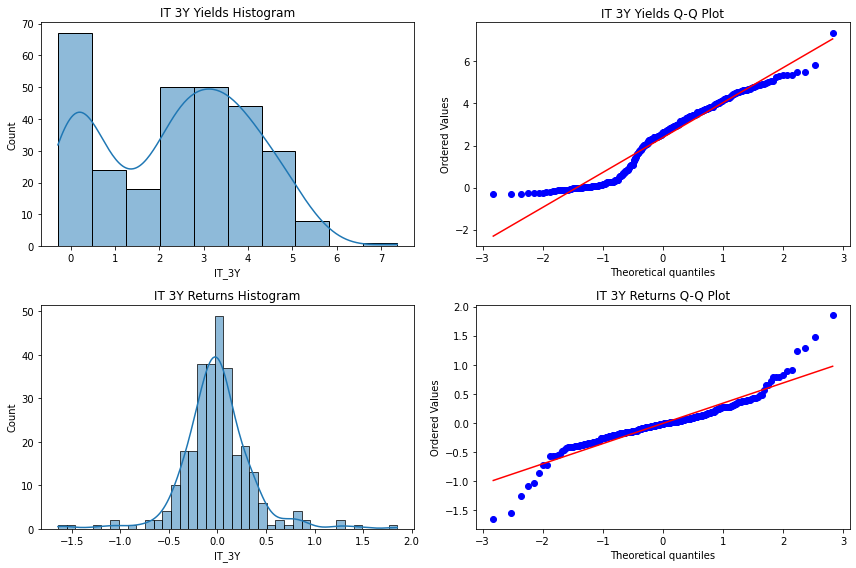

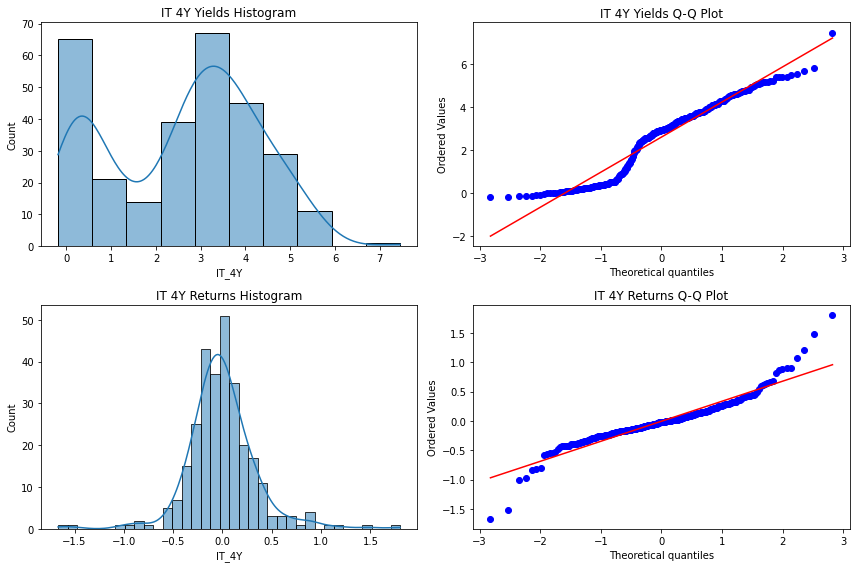

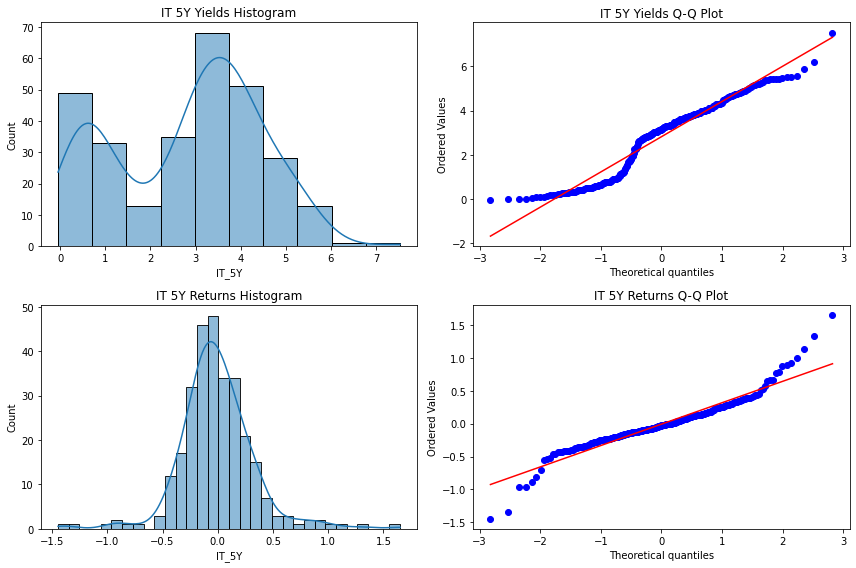

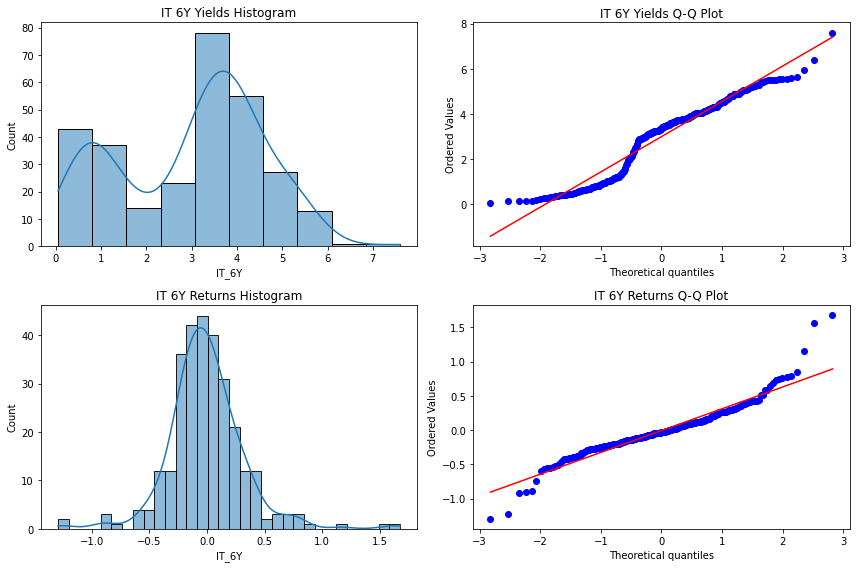

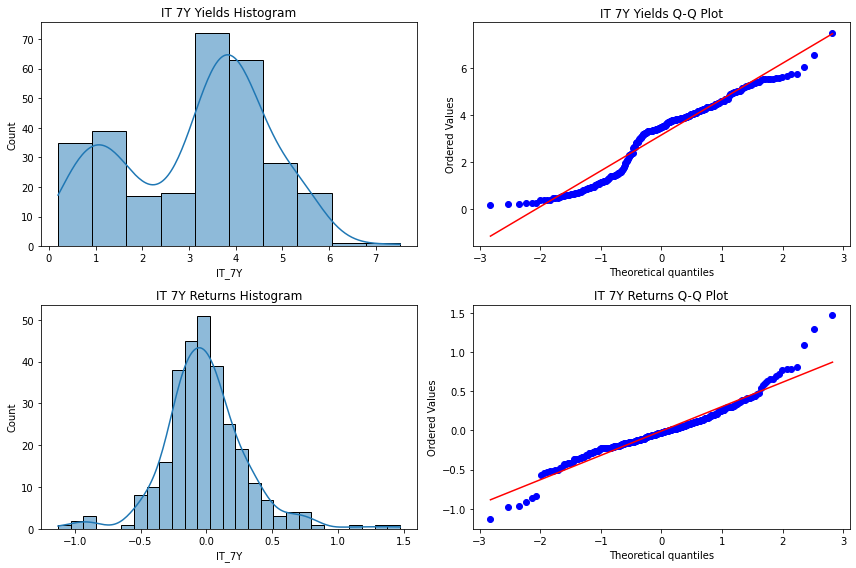

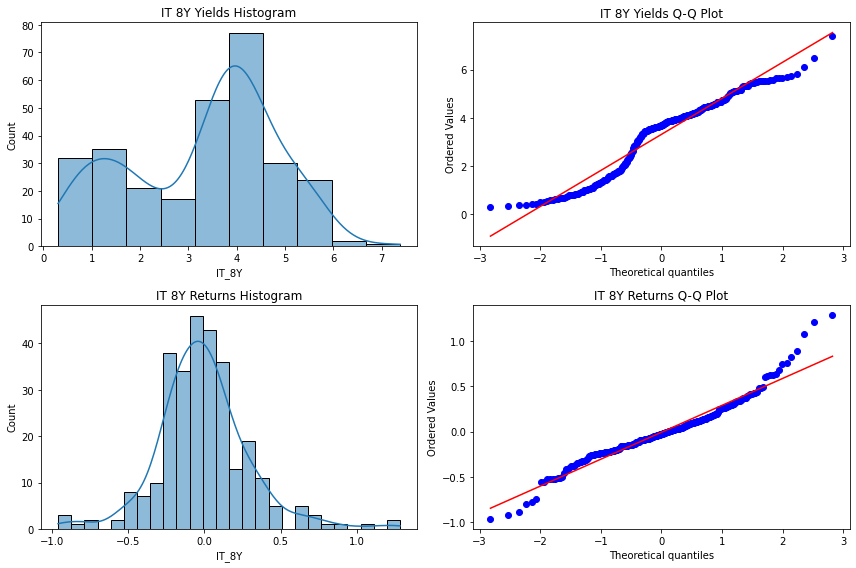

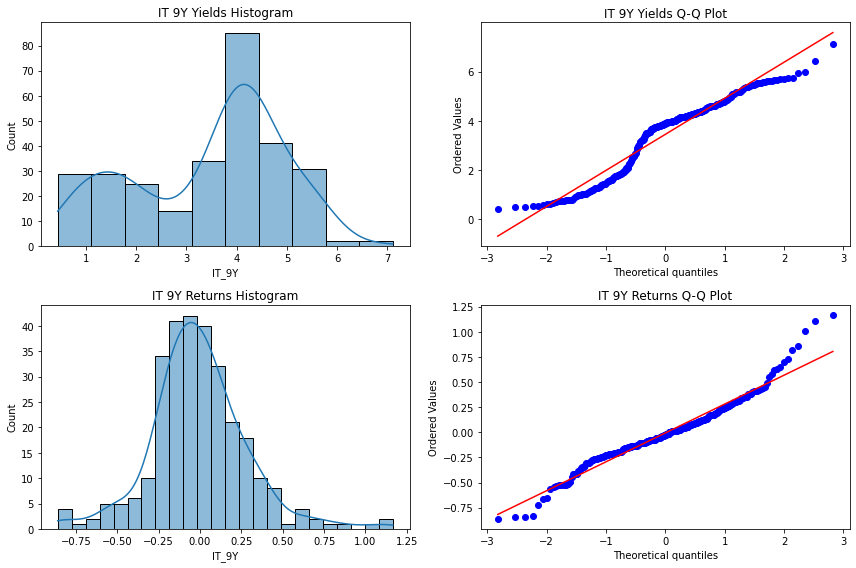

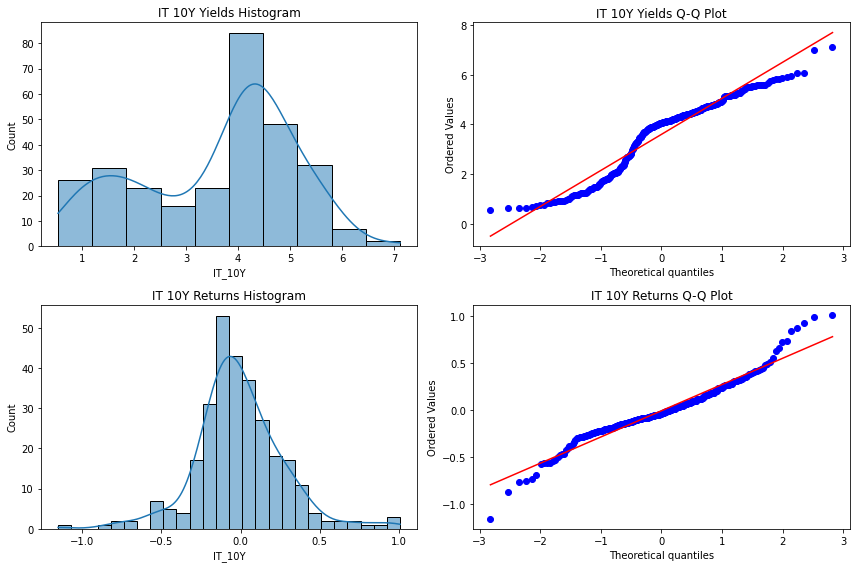

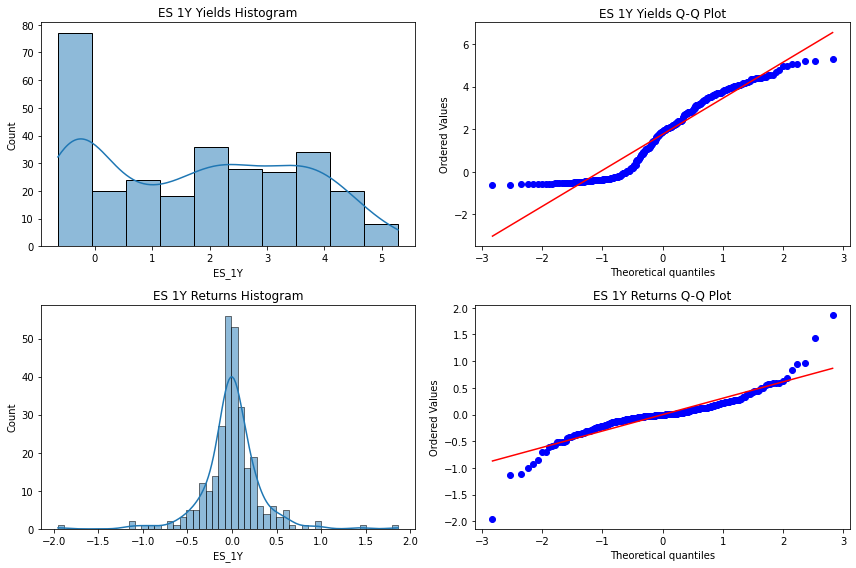

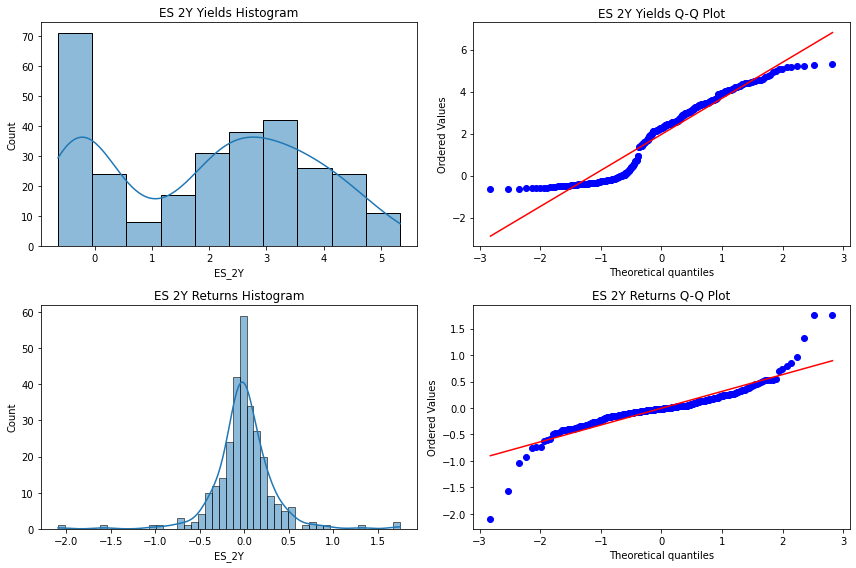

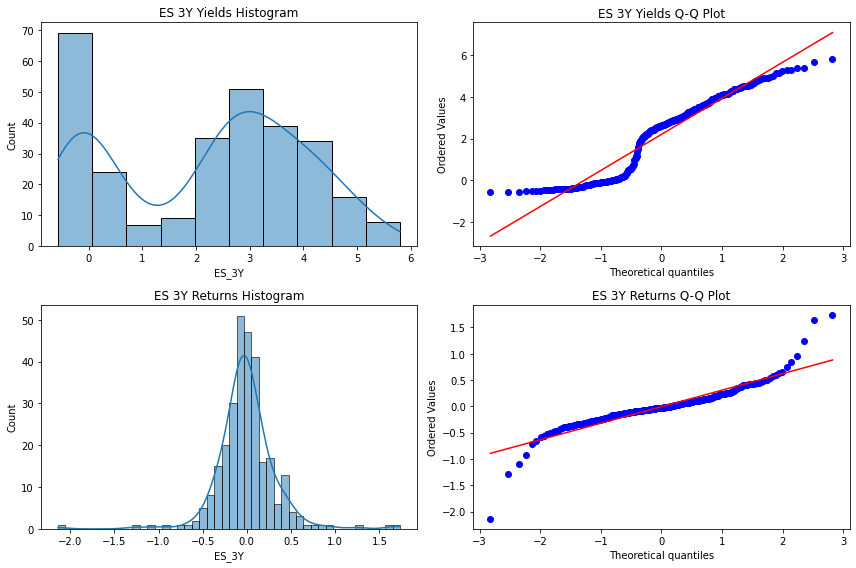

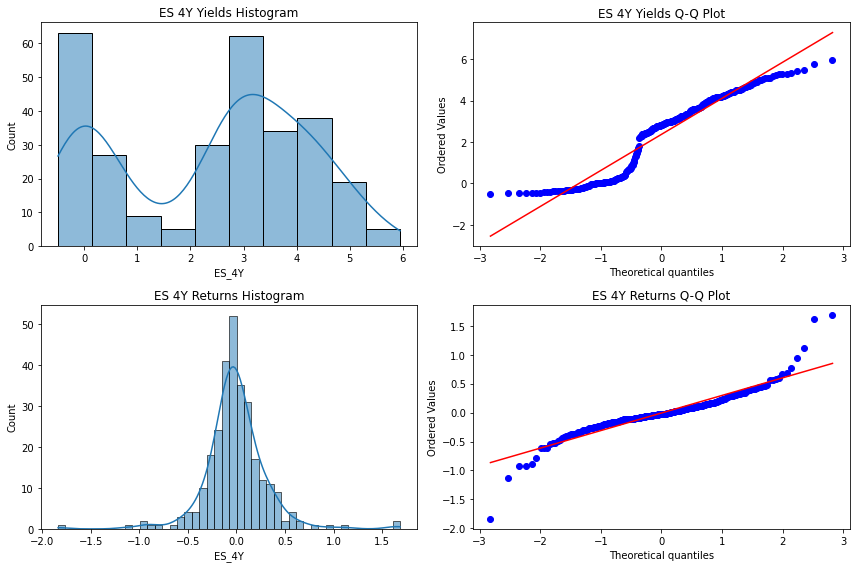

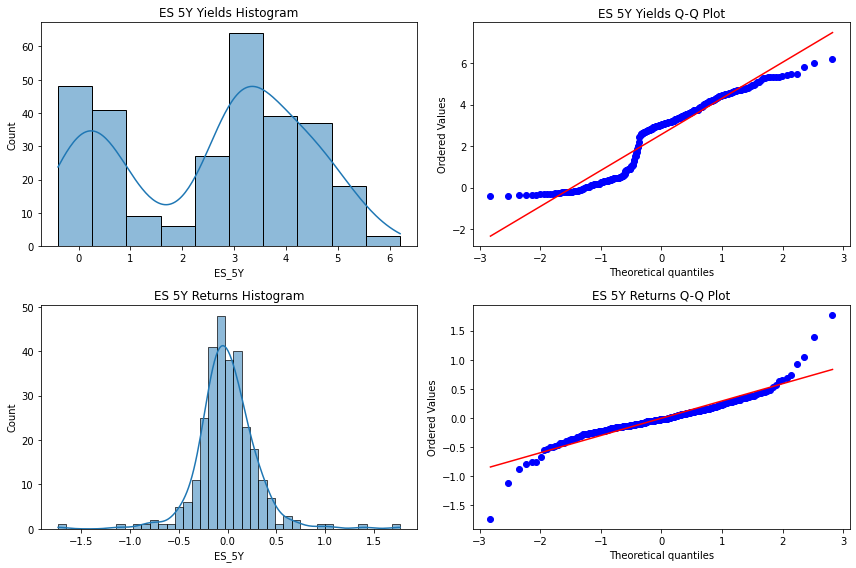

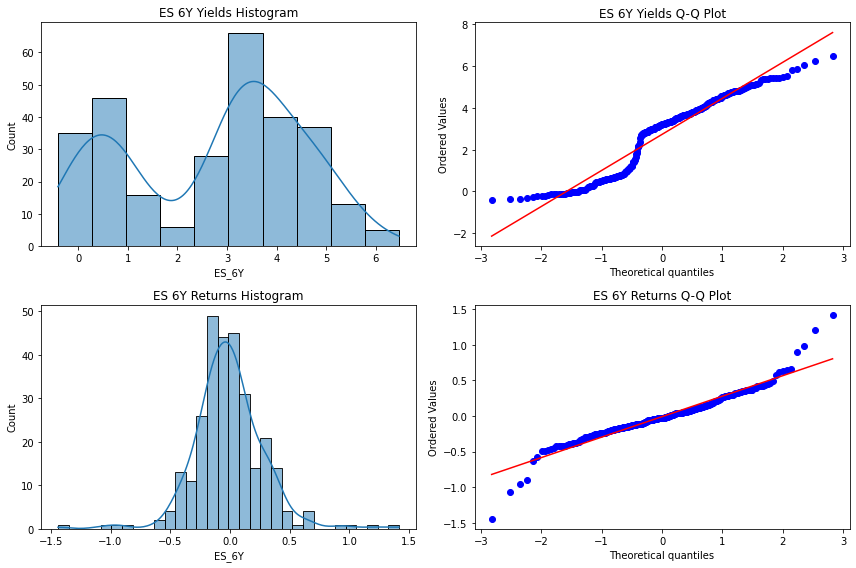

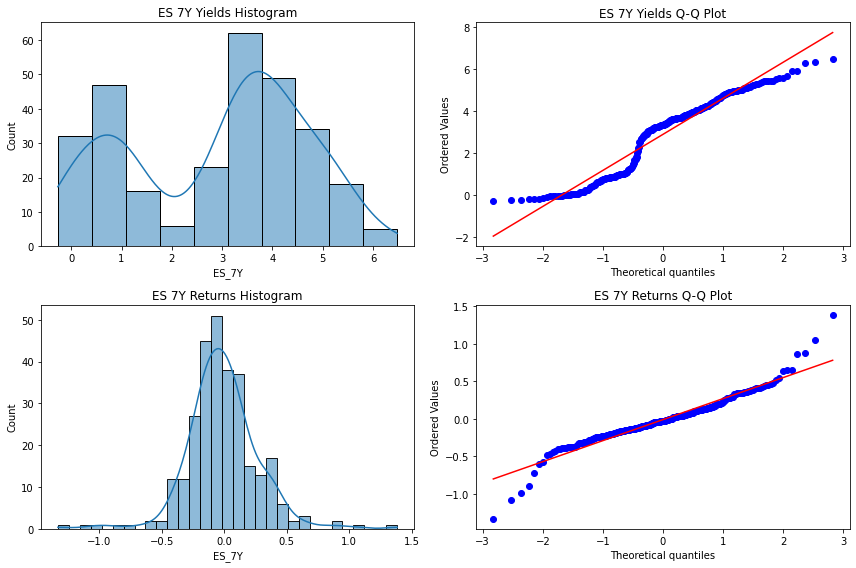

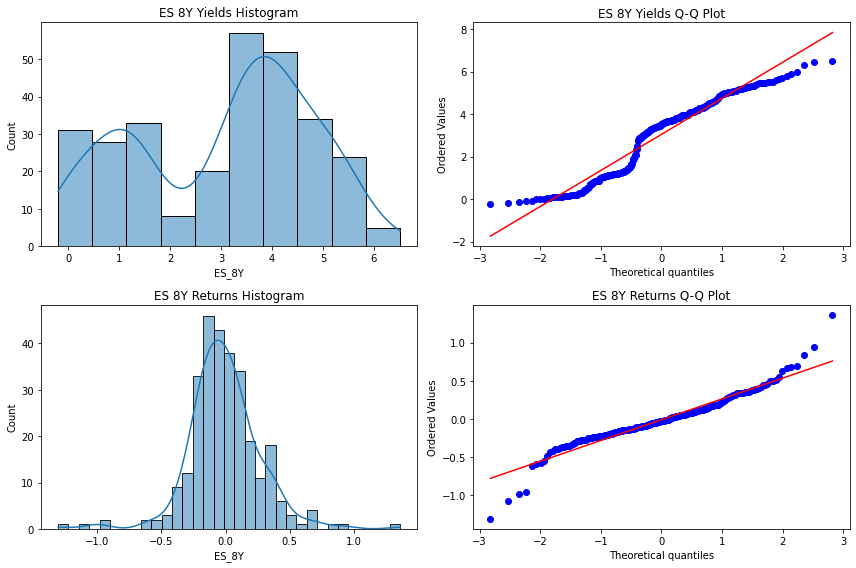

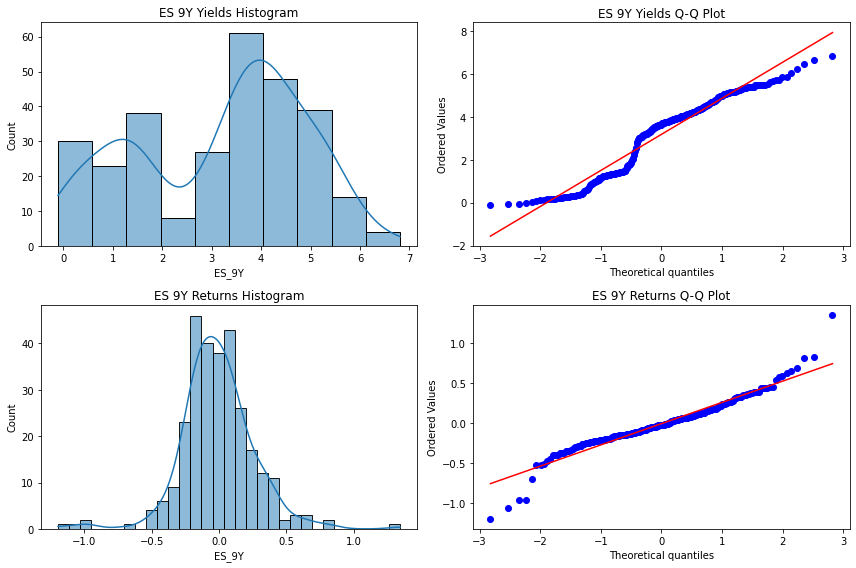

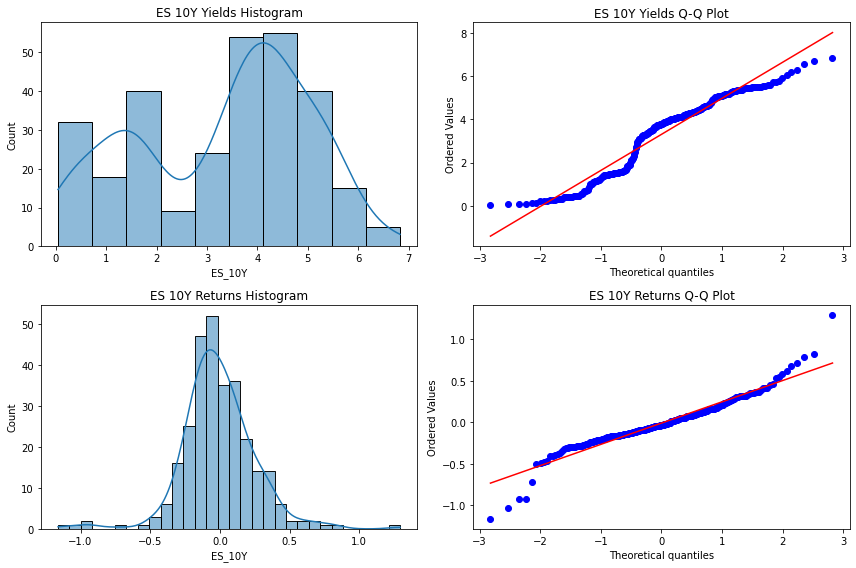

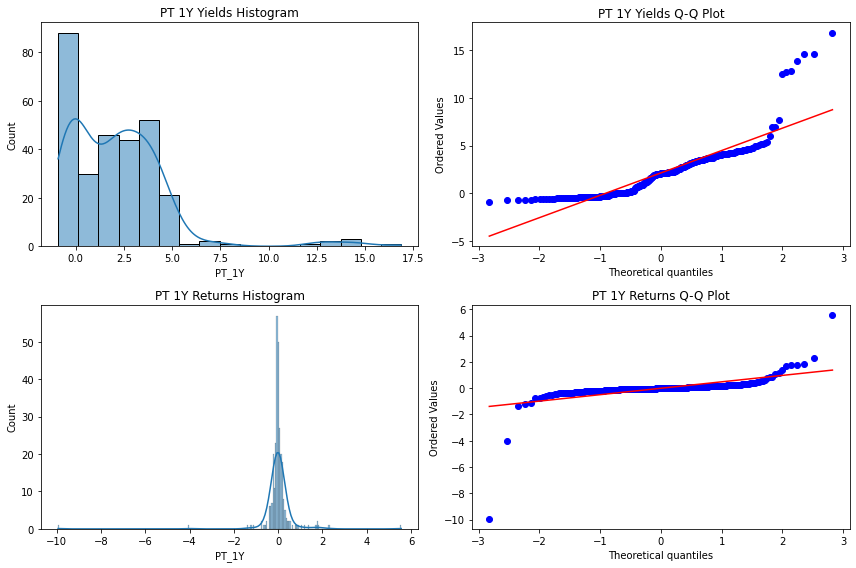

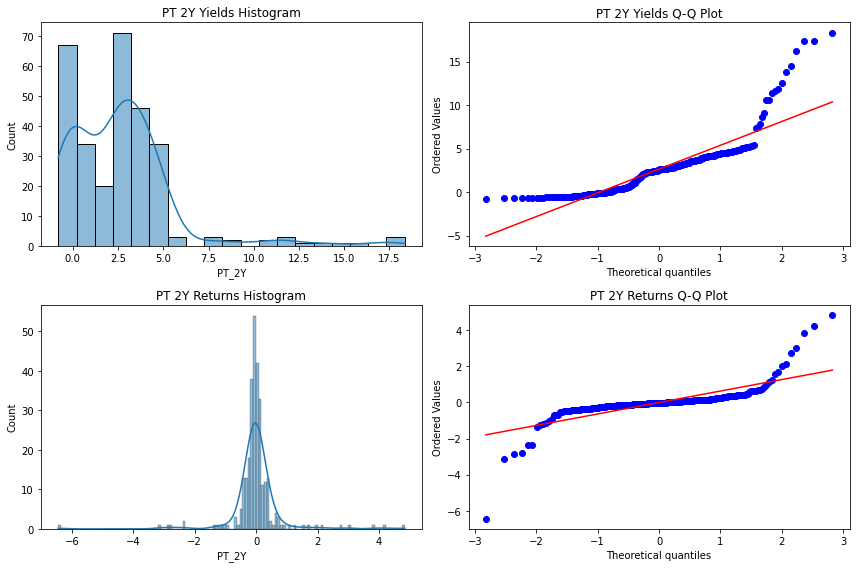

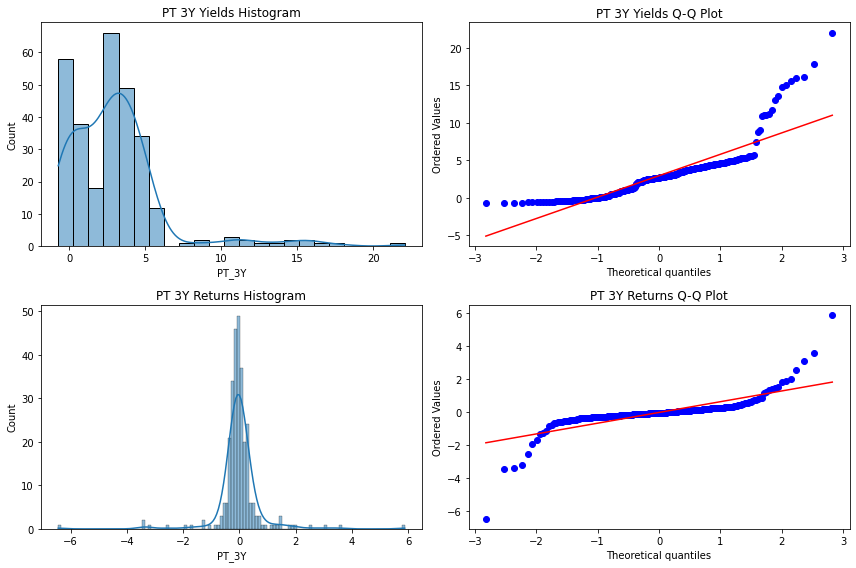

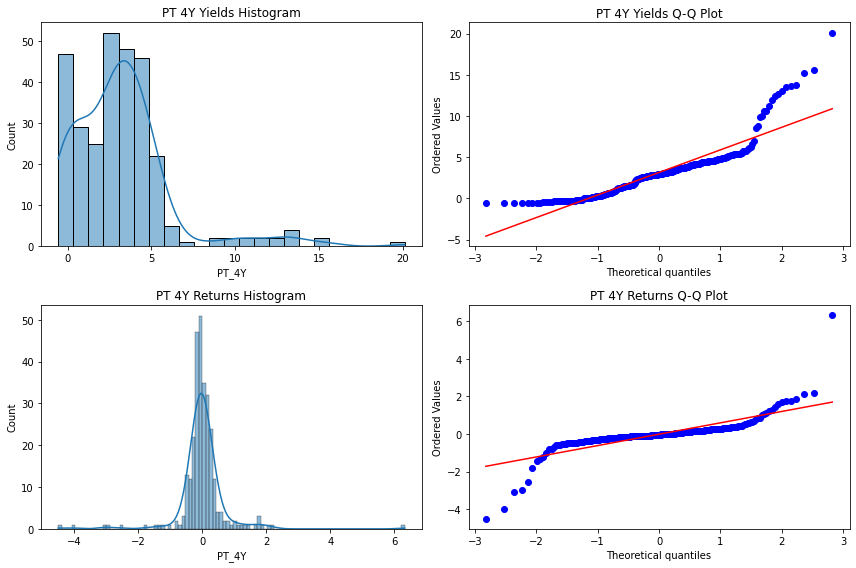

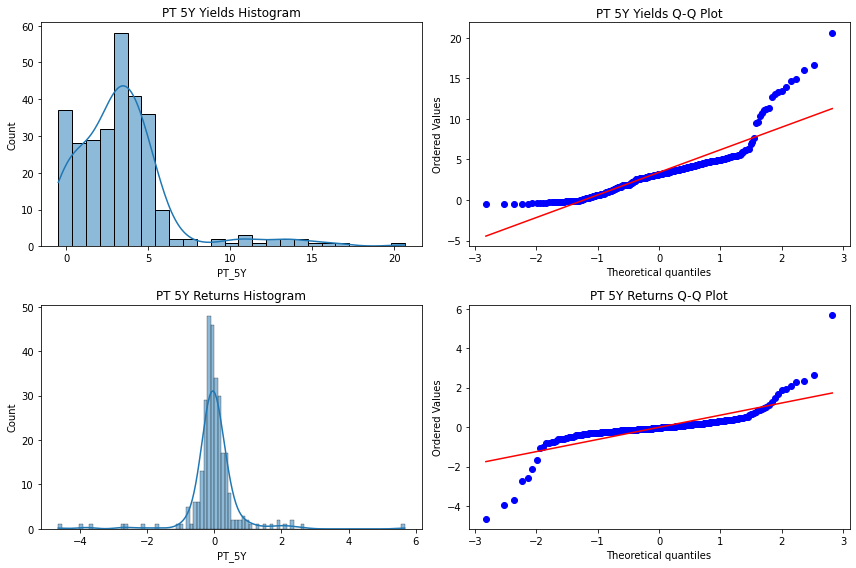

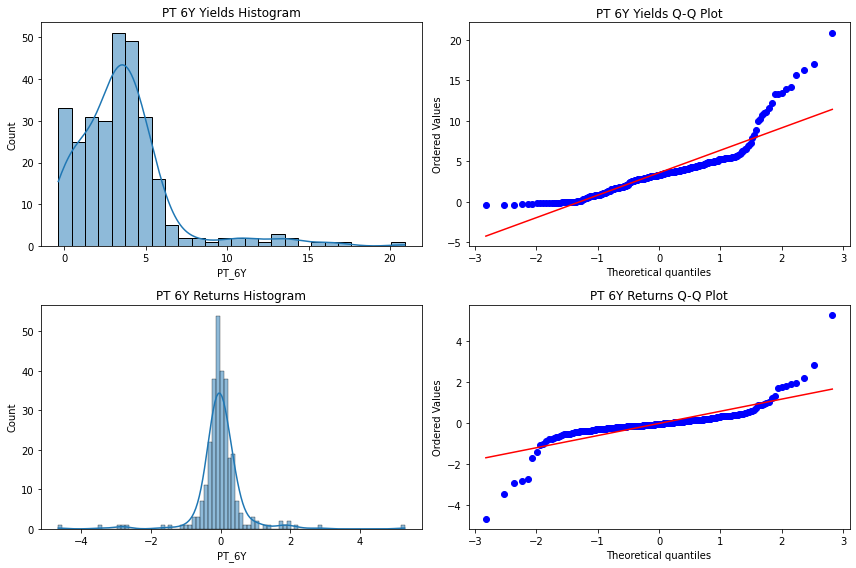

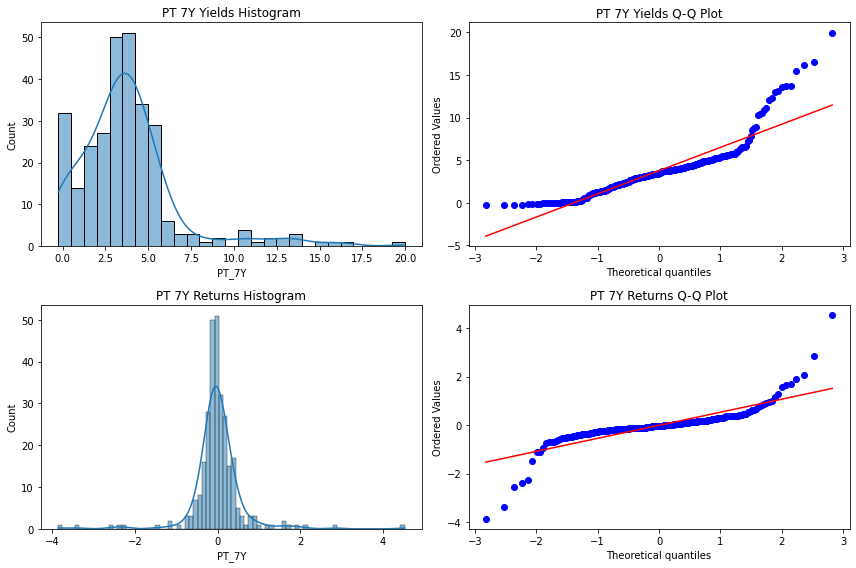

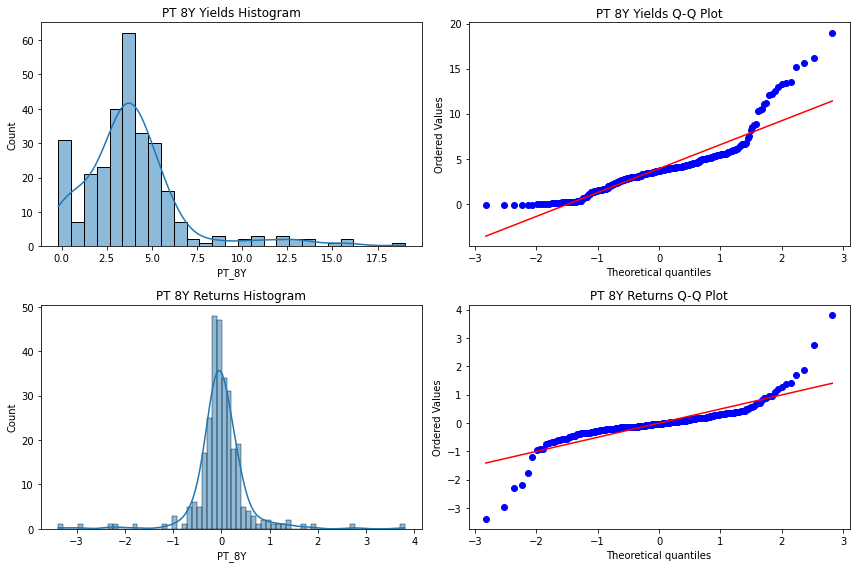

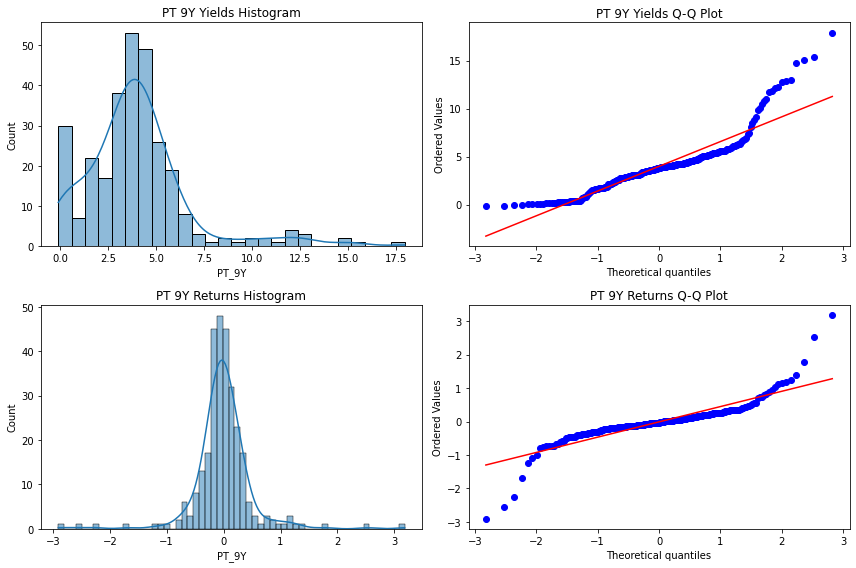

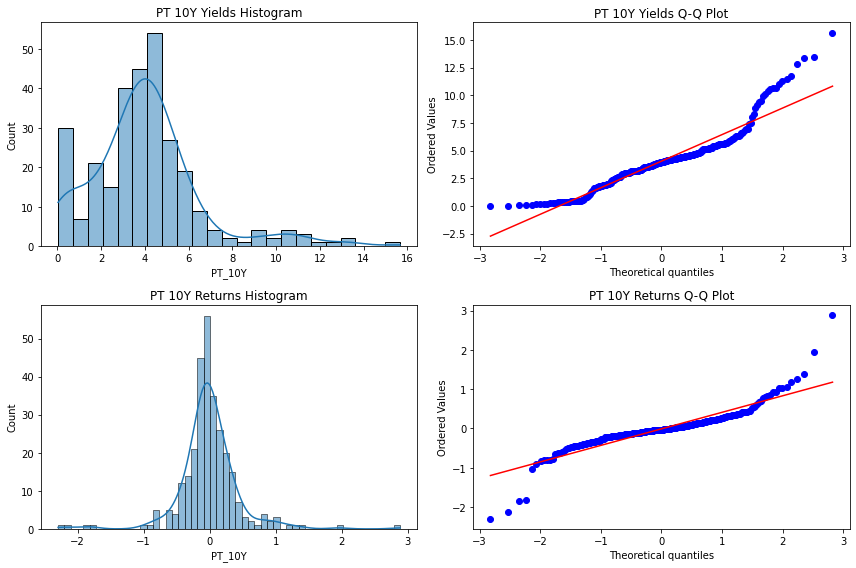

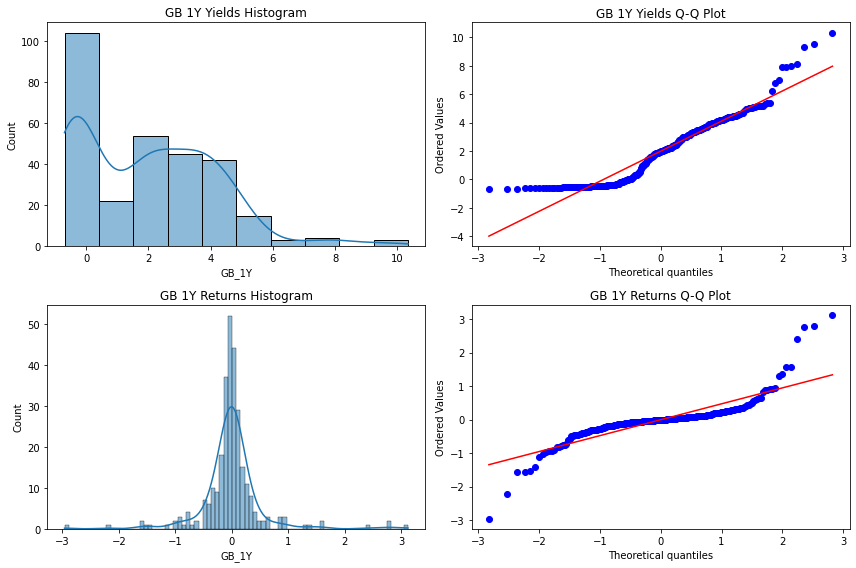

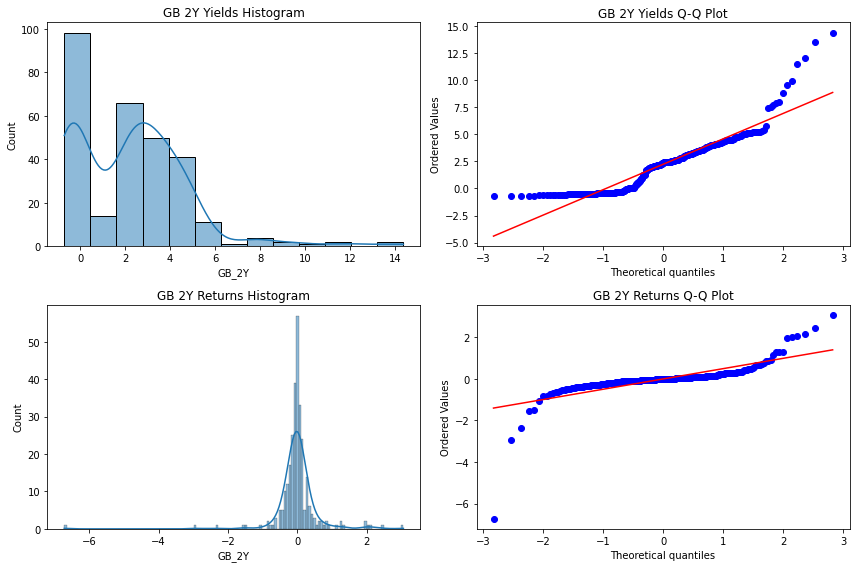

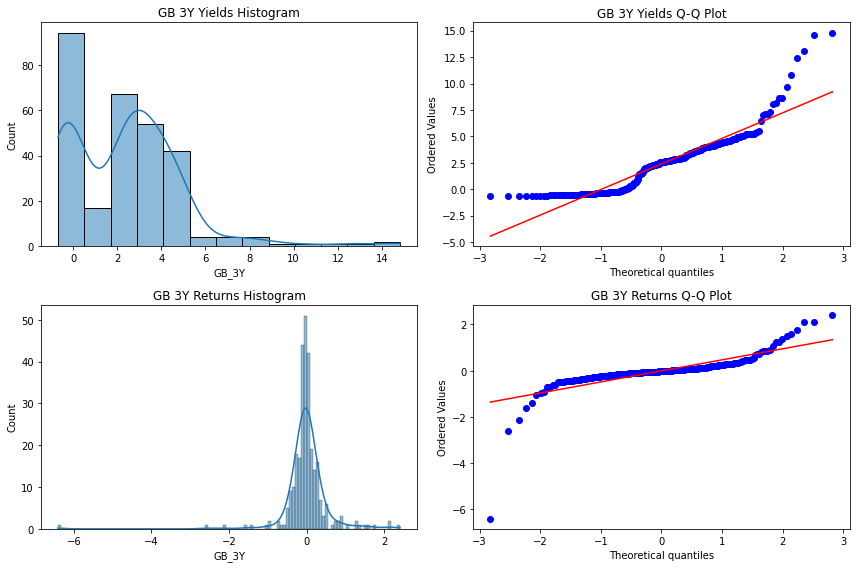

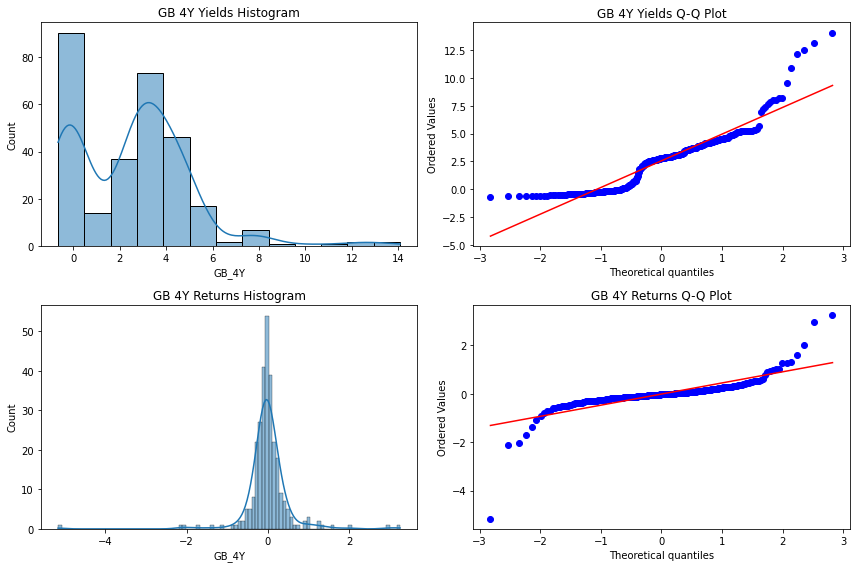

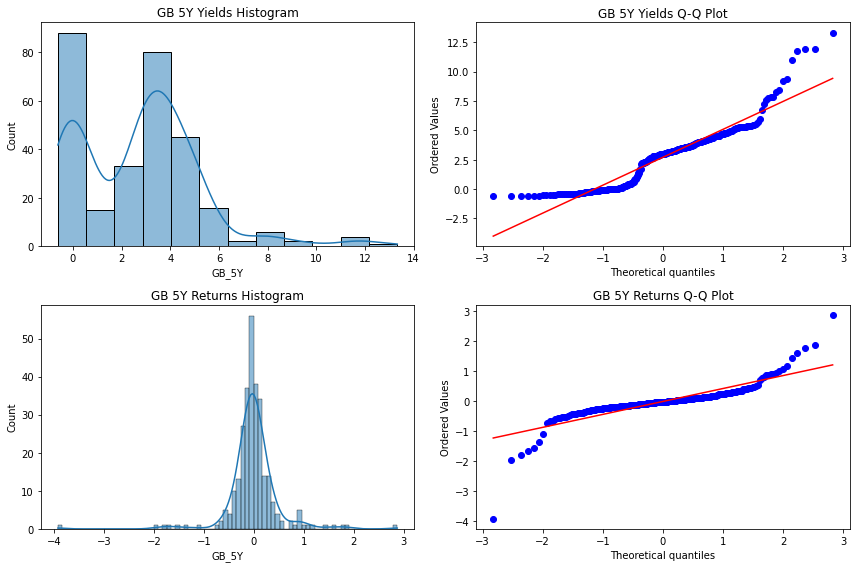

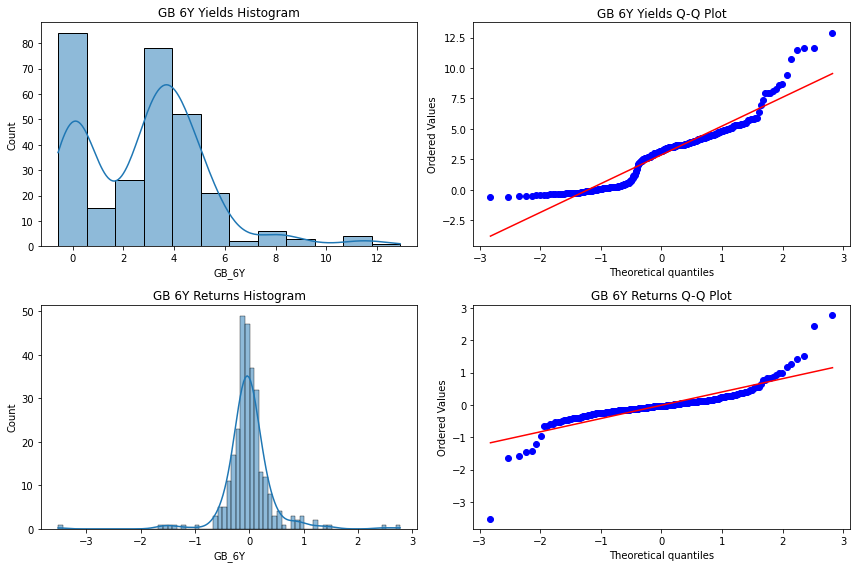

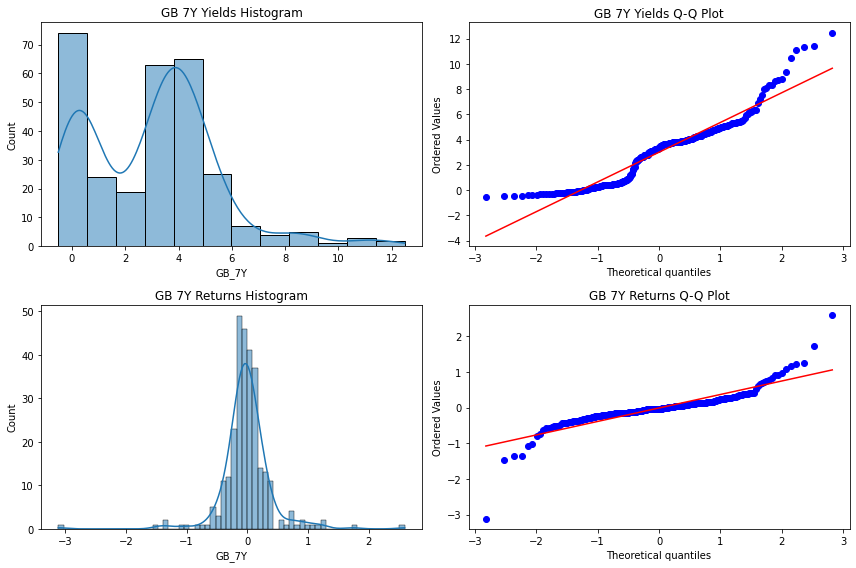

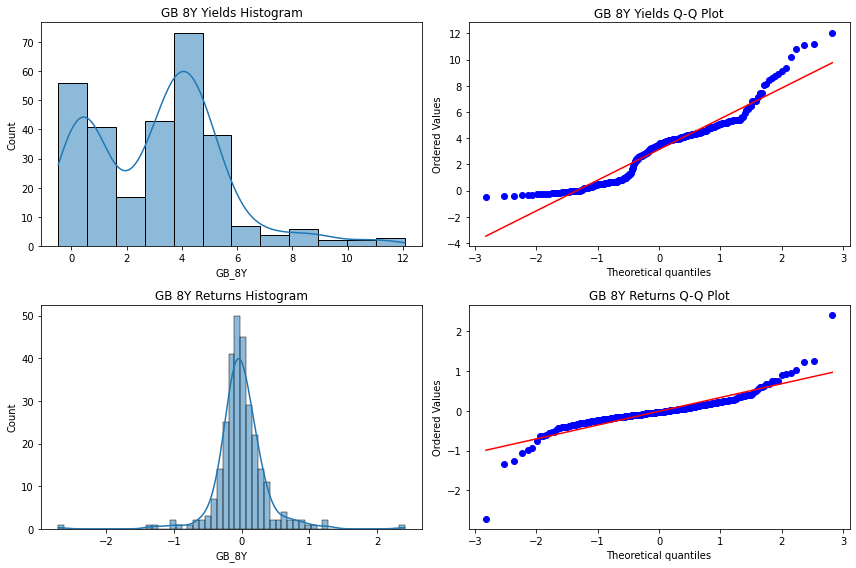

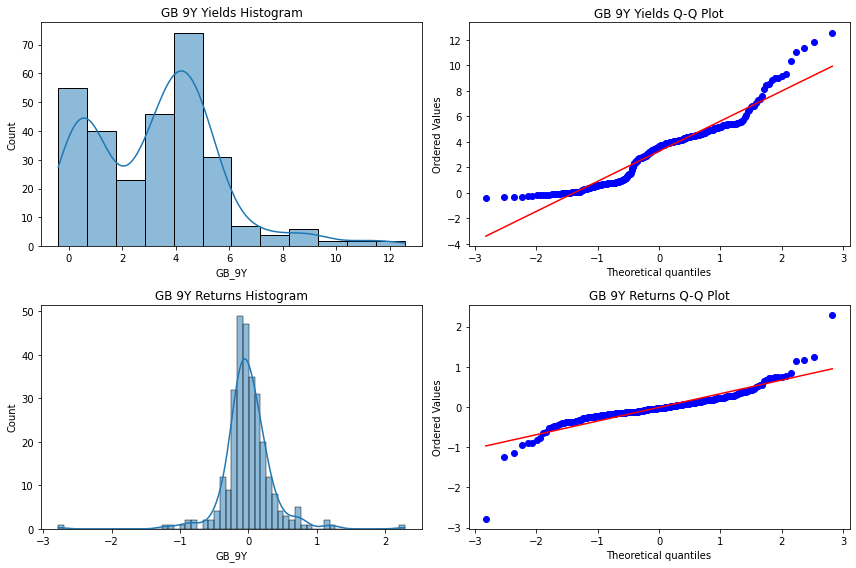

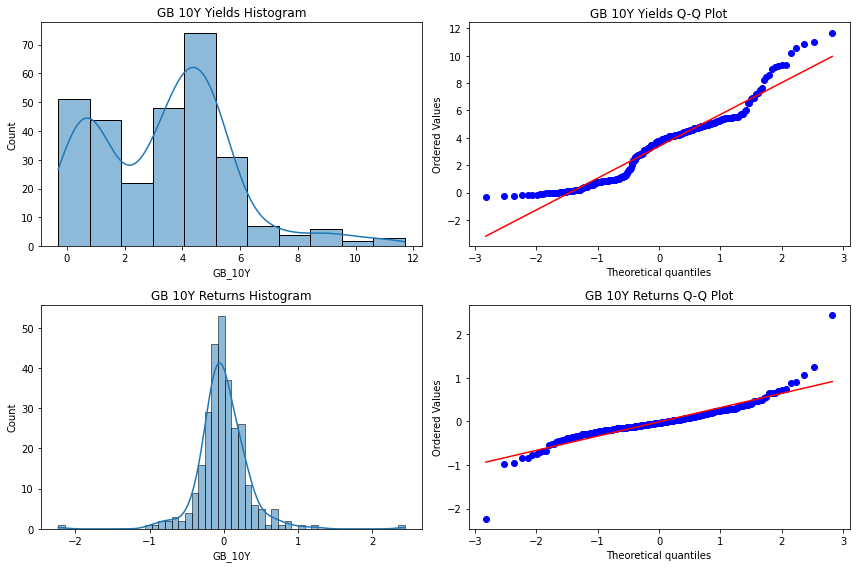

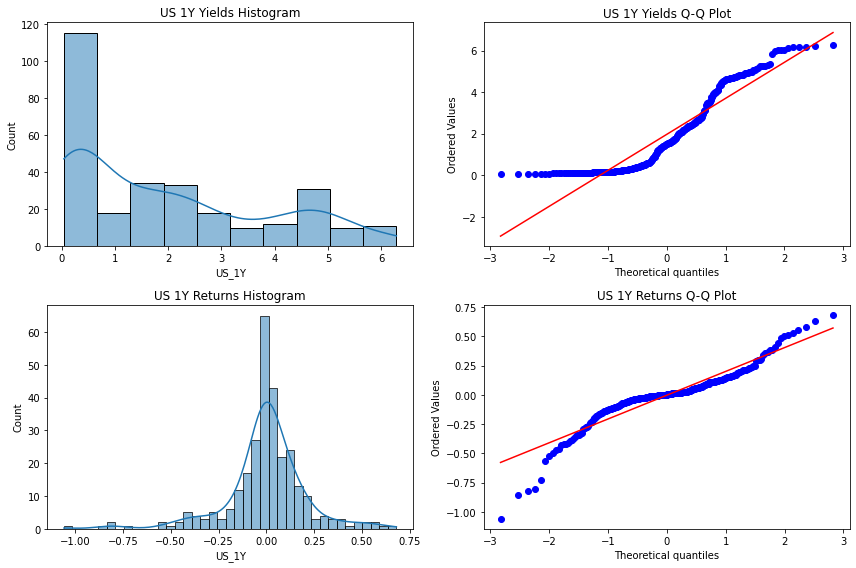

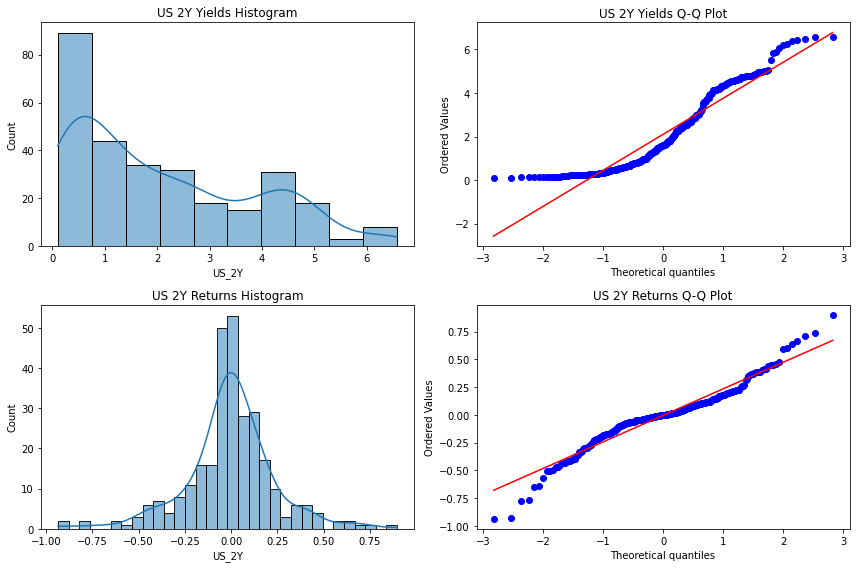

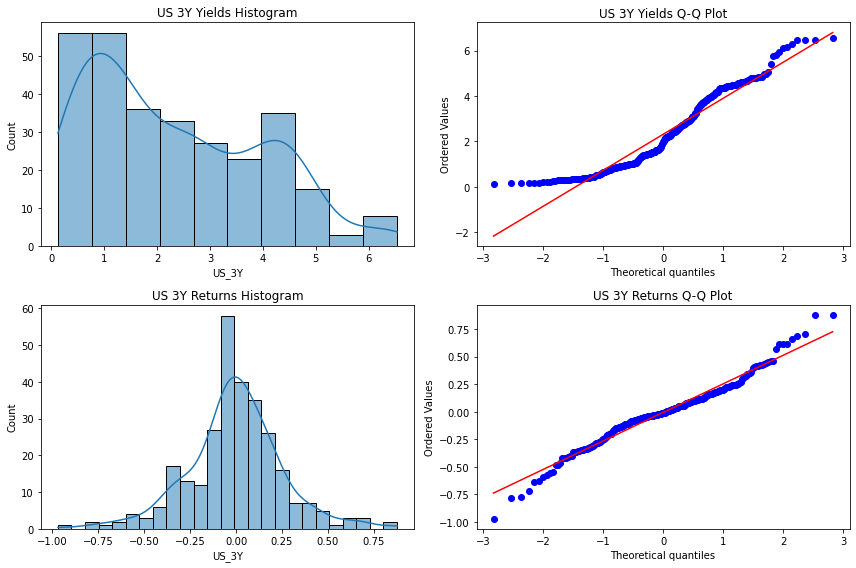

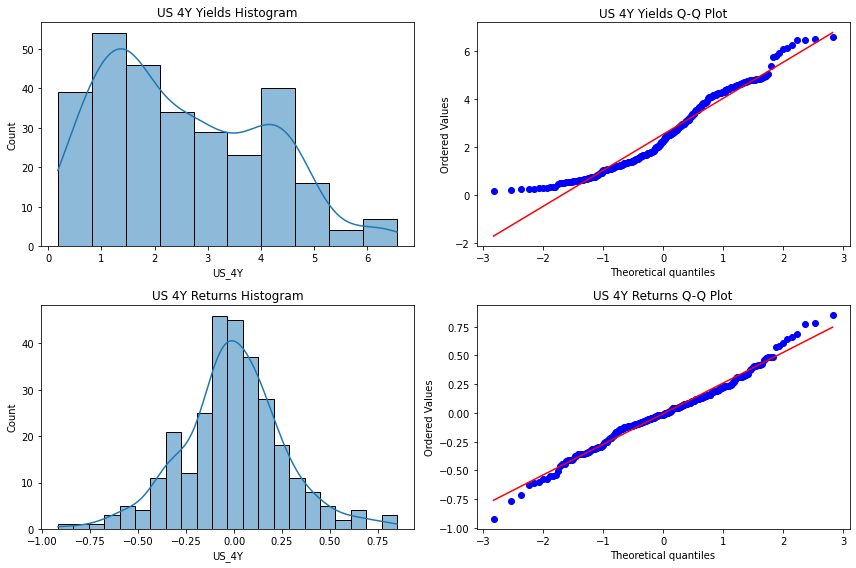

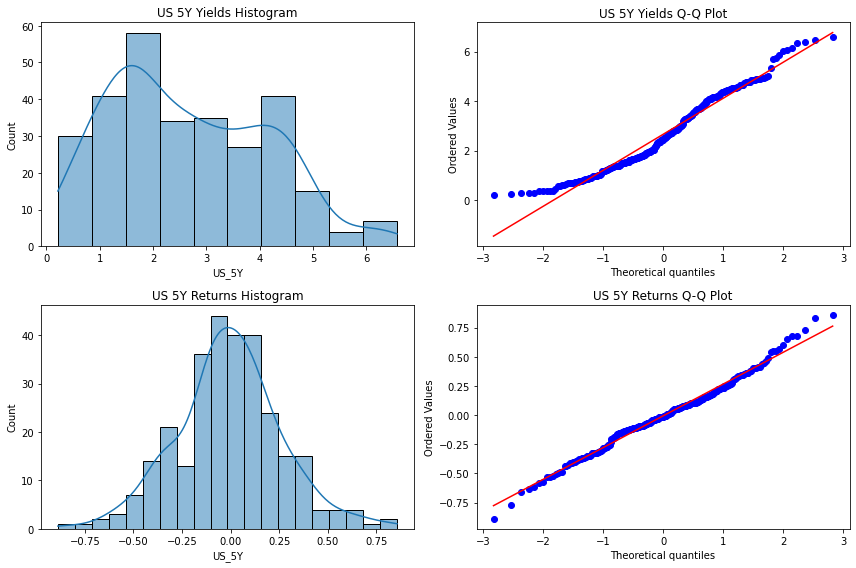

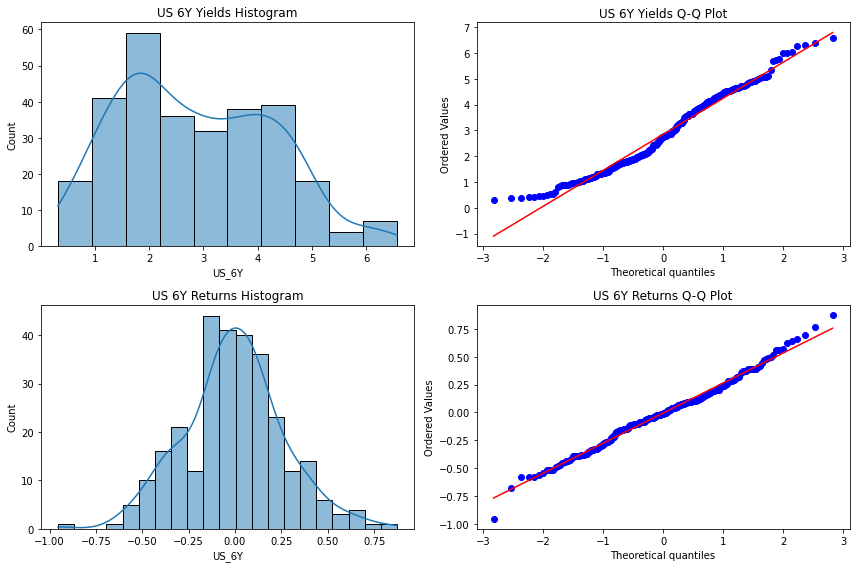

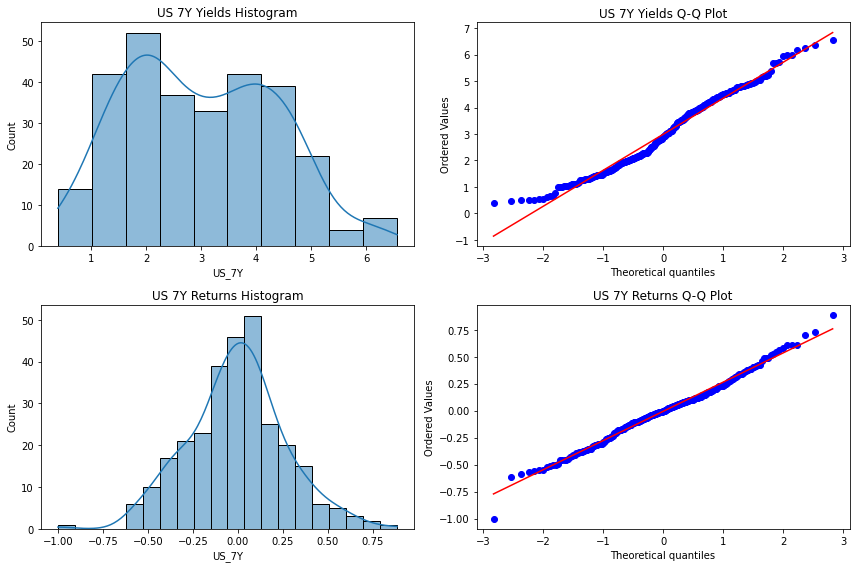

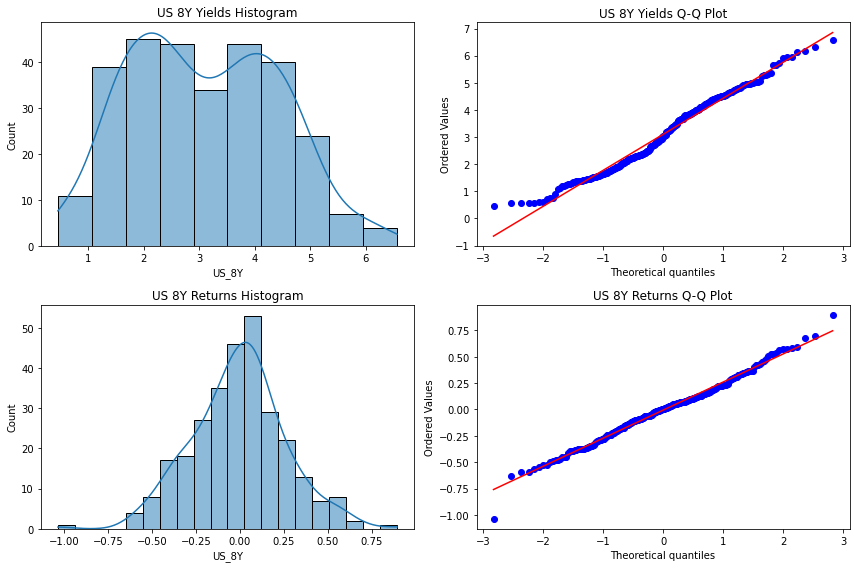

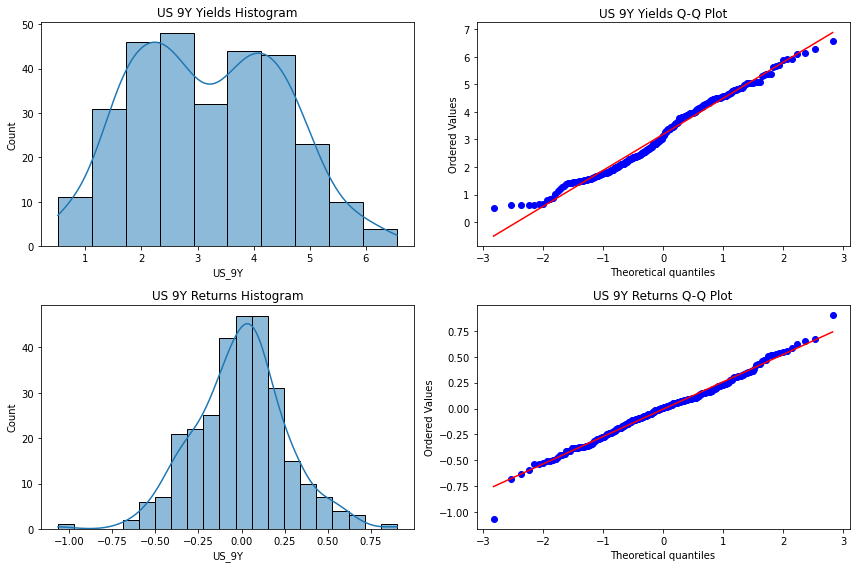

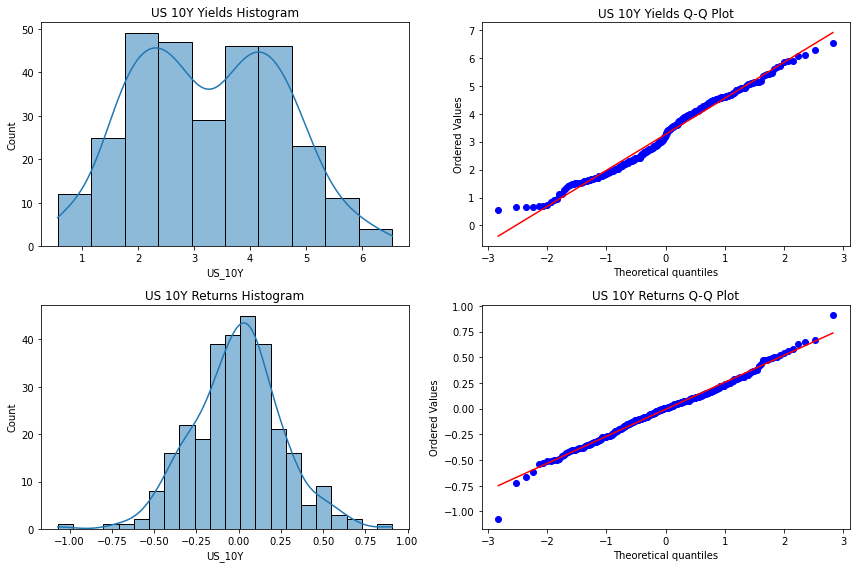

Normality test results for EA 1Y:
  Shapiro-Wilk test for yields: ShapiroResult(statistic=0.9198347926139832, pvalue=2.103386909091398e-11)
  Shapiro-Wilk test for returns: ShapiroResult(statistic=0.8937581777572632, pvalue=2.1070418901401183e-13)
  Kolmogorov-Smirnov test for yields: KstestResult(statistic=0.12284942412992472, pvalue=0.0002676414790095539)
  Kolmogorov-Smirnov test for returns: KstestResult(statistic=0.12849466579024038, pvalue=0.00011971160809128008)


Normality test results for EA 2Y:
  Shapiro-Wilk test for yields: ShapiroResult(statistic=0.9300796985626221, pvalue=1.7362573878632048e-10)
  Shapiro-Wilk test for returns: ShapiroResult(statistic=0.9509049654006958, pvalue=2.6774584327426965e-08)
  Kolmogorov-Smirnov test for yields: KstestResult(statistic=0.1318332071332421, pvalue=6.93132519450307e-05)
  Kolmogorov-Smirnov test for returns: KstestResult(statistic=0.09562902143726595, pvalue=0.00909631752363941)


Normality test results for EA 3Y:
  Shapiro-Wilk tes

In [111]:
# Define the list of maturities and countries
maturities = ['1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y']
countries = ['EA', 'DE', 'FR', 'NL', 'AT', 'FI', 'BE', 'IT', 'ES', 'PT', 'GB', 'US']

# Initialize a dictionary to store results
normality_results = {}

# Loop through each country and each maturity
for country in countries:
    for maturity in maturities:
        col_name = f'{country}_{maturity}'
        if col_name in df.columns:
            yields = df[col_name].dropna().astype(float)
            returns = yields.diff().dropna()

            # Shapiro-Wilk test for yields and returns
            shapiro_yields = shapiro(yields)
            shapiro_returns = shapiro(returns)

            # Kolmogorov-Smirnov test for yields and returns
            ks_yields = kstest(yields, 'norm', args=(yields.mean(), yields.std()))
            ks_returns = kstest(returns, 'norm', args=(returns.mean(), returns.std()))

            # Store results
            normality_results[(country, maturity)] = {
                'Shapiro_Yields': shapiro_yields,
                'Shapiro_Returns': shapiro_returns,
                'KS_Yields': ks_yields,
                'KS_Returns': ks_returns
            }

            # Plotting
            plt.figure(figsize=(12, 8))

            # Histogram for yields
            plt.subplot(2, 2, 1)
            sns.histplot(yields, kde=True)
            plt.title(f'{country} {maturity} Yields Histogram')

            # Q-Q plot for yields
            plt.subplot(2, 2, 2)
            probplot(yields, dist="norm", plot=plt)
            plt.title(f'{country} {maturity} Yields Q-Q Plot')

            # Histogram for returns
            plt.subplot(2, 2, 3)
            sns.histplot(returns, kde=True)
            plt.title(f'{country} {maturity} Returns Histogram')

            # Q-Q plot for returns
            plt.subplot(2, 2, 4)
            probplot(returns, dist="norm", plot=plt)
            plt.title(f'{country} {maturity} Returns Q-Q Plot')

            plt.tight_layout()
            plt.show()

# Print a summary of the normality test results
for key, value in normality_results.items():
    country, maturity = key
    print(f"Normality test results for {country} {maturity}:")
    print(f"  Shapiro-Wilk test for yields: {value['Shapiro_Yields']}")
    print(f"  Shapiro-Wilk test for returns: {value['Shapiro_Returns']}")
    print(f"  Kolmogorov-Smirnov test for yields: {value['KS_Yields']}")
    print(f"  Kolmogorov-Smirnov test for returns: {value['KS_Returns']}")
    print("\n")